In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

## 1. –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö. –û–ø–∏—Å–∞–Ω–∏–µ –∑–∞–¥–∞—á–∏

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [4]:
train.head(5)

Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                  NaN        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN           1.0   
1                        0.0                           NaN           0.0   
2                        0.0                           NaN           0.0   
3                        1.0                           NaN           1.0   
4                        1.0                           NaN           0.0   

              Purpose        Term  Current Loan Amount  \
0  debt consolidation  Short Term           99999999.0   
1  debt consolidation   Long Term             264968.0   
2  debt consolidation  Short Term           99999999.0   
3  debt consolidation  Short Term             121396.0   
4  debt consolidation  Short Term             125840.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                 47386.0        7914.0         749.0               0  
1                394972.0       18373.0         737.0               1  
2                308389.0       13651.0         742.0               0  
3                 95855.0       11338.0         694.0               0  
4                 93309.0        7180.0         719.0               0

In [5]:
test.head(5)

Home Ownership  Annual Income Years in current job  Tax Liens  \
0           Rent            NaN              4 years        0.0   
1           Rent       231838.0               1 year        0.0   
2  Home Mortgage      1152540.0              3 years        0.0   
3  Home Mortgage      1220313.0            10+ years        0.0   
4  Home Mortgage      2340952.0              6 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                      9.0                     12.5             220968.0   
1                      6.0                     32.7              55946.0   
2                     10.0                     13.7             204600.0   
3                     16.0                     17.0             456302.0   
4                     11.0                     23.6            1207272.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        0.0                          70.0           0.0   
1                        0.0                           8.0           0.0   
2                        0.0                           NaN           0.0   
3                        0.0                          70.0           0.0   
4                        0.0                           NaN           0.0   

                Purpose        Term  Current Loan Amount  \
0    debt consolidation  Short Term             162470.0   
1  educational expenses  Short Term              78298.0   
2    debt consolidation  Short Term             200178.0   
3    debt consolidation  Short Term             217382.0   
4    debt consolidation   Long Term             777634.0   

   Current Credit Balance  Monthly Debt  Credit Score  
0                105906.0        6813.0           NaN  
1                 46037.0        2318.0         699.0  
2                146490.0       18729.0        7260.0  
3                213199.0       27559.0         739.0  
4                425391.0       42605.0         706.0

**–û–ø–∏—Å–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞**

* **Home Ownership** - –¥–æ–º–æ–≤–ª–∞–¥–µ–Ω–∏–µ
* **Annual Income** - –≥–æ–¥–æ–≤–æ–π –¥–æ—Ö–æ–¥
* **Years in current job** - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–µ—Ç –Ω–∞ —Ç–µ–∫—É—â–µ–º –º–µ—Å—Ç–µ —Ä–∞–±–æ—Ç—ã
* **Tax Liens** - –Ω–∞–ª–æ–≥–æ–≤—ã–µ –æ–±—Ä–µ–º–µ–Ω–µ–Ω–∏—è
* **Number of Open Accounts** - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∫—Ä—ã—Ç—ã—Ö —Å—á–µ—Ç–æ–≤
* **Years of Credit History** - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–µ—Ç –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∏—Å—Ç–æ—Ä–∏–∏
* **Maximum Open Credit** - –Ω–∞–∏–±–æ–ª—å—à–∏–π –æ—Ç–∫—Ä—ã—Ç—ã–π –∫—Ä–µ–¥–∏—Ç
* **Number of Credit Problems** - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–±–ª–µ–º —Å –∫—Ä–µ–¥–∏—Ç–æ–º
* **Months since last delinquent** - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –º–µ—Å—è—Ü–µ–≤ —Å –ø–æ—Å–ª–µ–¥–Ω–µ–π –ø—Ä–æ—Å—Ä–æ—á–∫–∏ –ø–ª–∞—Ç–µ–∂–∞
* **Bankruptcies** - –±–∞–Ω–∫—Ä–æ—Ç—Å—Ç–≤–∞
* **Purpose** - —Ü–µ–ª—å –∫—Ä–µ–¥–∏—Ç–∞
* **Term** - —Å—Ä–æ–∫ –∫—Ä–µ–¥–∏—Ç–∞
* **Current Loan Amount** - —Ç–µ–∫—É—â–∞—è —Å—É–º–º–∞ –∫—Ä–µ–¥–∏—Ç–∞
* **Current Credit Balance** - —Ç–µ–∫—É—â–∏–π –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –±–∞–ª–∞–Ω—Å
* **Monthly Debt** - –µ–∂–µ–º–µ—Å—è—á–Ω—ã–π –¥–æ–ª–≥
* **Credit Default** - –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è. —Ñ–∞–∫—Ç –Ω–µ–≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–Ω—ã—Ö –æ–±—è–∑–∞—Ç–µ–ª—å—Å—Ç–≤ (0 - –ø–æ–≥–∞—à–µ–Ω –≤–æ–≤—Ä–µ–º—è, 1 - –ø—Ä–æ—Å—Ä–æ—á–∫–∞)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

–ü—Ä–æ–ø—É—Å–∫–∏ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –∏ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –∏ –≤ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

–î–ª—è –Ω–∞—á–∞–ª–∞ —Å—Ä–∞–≤–Ω–∏–º —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É. –ù–∞—Å–∫–æ–ª—å–∫–æ –æ–Ω–∏ –ø–æ—Ö–æ–∂–∏.

In [8]:
TARGET = 'Credit Default'

train_data = train.drop(TARGET, axis=1)

–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –¥–≤—É—Ö –≤—ã–±–æ—Ä–æ–∫ (—Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–∞—è –∏ —Ç–µ—Å—Ç–æ–≤–∞—è) –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º —Å —á–∏—Å–ª–æ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏.

**–ì–∏–ø–æ—Ç–µ–∑–∞** 
* –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –¥–≤—É—Ö –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö —Ä–∞–≤–Ω—ã
* –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –¥–≤—É—Ö –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è
* –ö—Ä–∏—Ç–µ—Ä–∏–π: –∫—Ä–∏—Ç–µ—Ä–∏–π –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏
* –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ $\alpha$: 0.05
* –ö—Ä–∏—Ç–∏—á–µ—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å: –¥–≤—É—Ö—Å—Ç–æ—Ä–æ–Ω–Ω—è—è

–î–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –¥–∞–Ω–Ω–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã —Å—Ä–∞–≤–Ω–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å —á–∏—Å–ª–æ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –¥–≤—É—Ö –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –≤—ã–±–æ—Ä–æ–∫ –Ω–∞ –ø—Ä–µ–¥–º–µ—Ç —Ä–∞–≤–µ–Ω—Å—Ç–≤–∞ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏–π. 

Annual Income
MannwhitneyuResult(statistic=9362155.5, pvalue=0.45908193952511717)


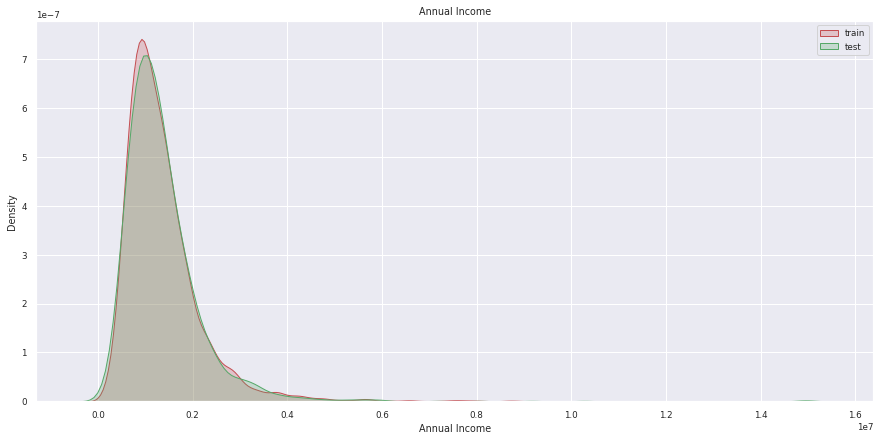

Tax Liens
MannwhitneyuResult(statistic=9336937.5, pvalue=0.09836860283803656)


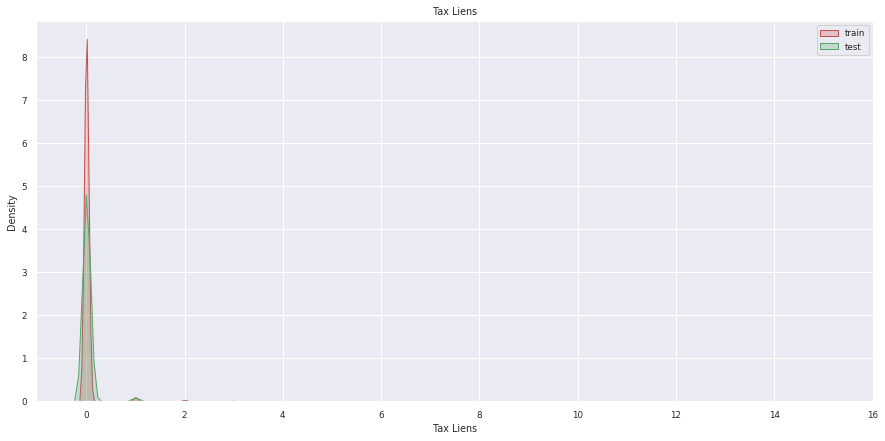

Number of Open Accounts
MannwhitneyuResult(statistic=9279311.5, pvalue=0.22142637178864455)


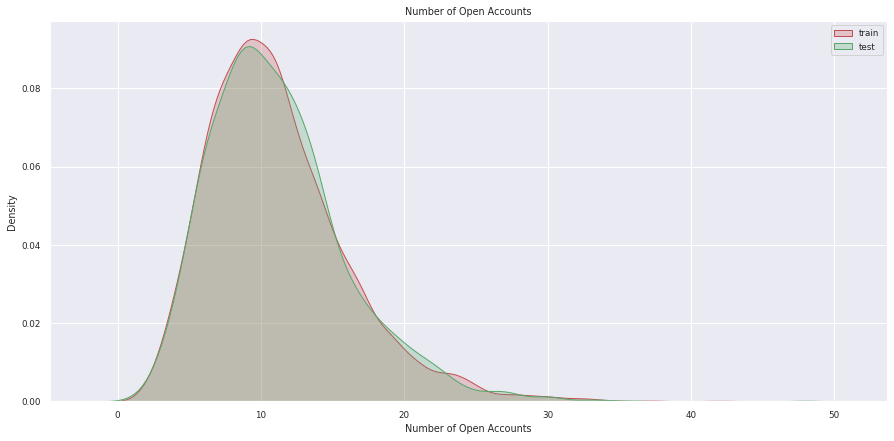

Years of Credit History
MannwhitneyuResult(statistic=9339658.0, pvalue=0.3886945952485082)


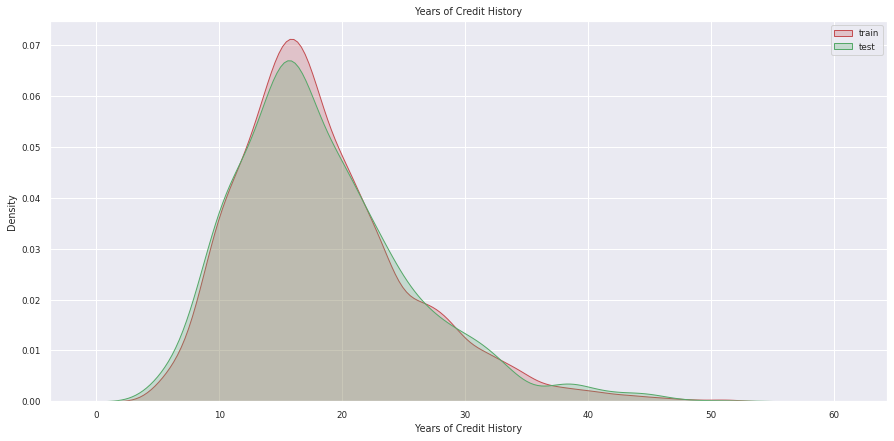

Maximum Open Credit
MannwhitneyuResult(statistic=9337869.0, pvalue=0.3832220993414893)


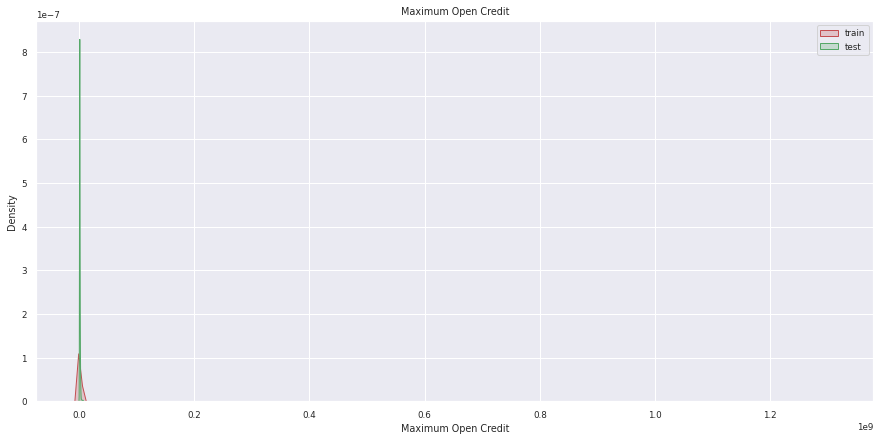

Number of Credit Problems
MannwhitneyuResult(statistic=9295513.5, pvalue=0.14195772552376257)


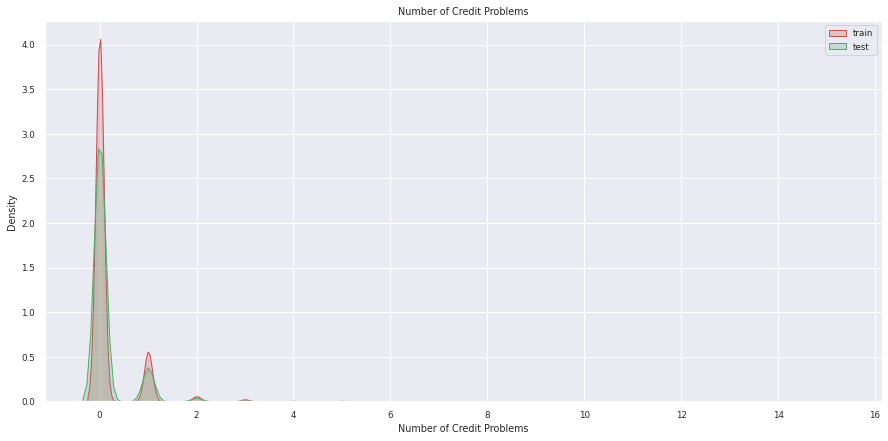

Months since last delinquent
MannwhitneyuResult(statistic=6974400.5, pvalue=1.712573746209761e-82)


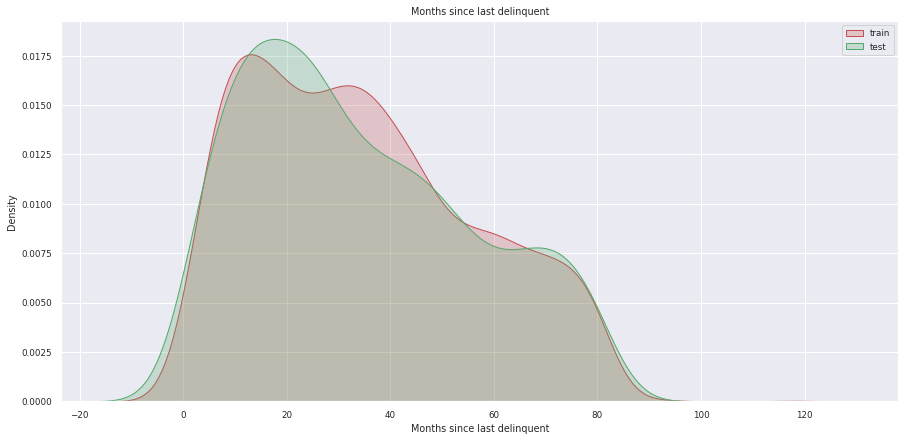

Bankruptcies
MannwhitneyuResult(statistic=9254231.0, pvalue=0.036681545859698156)


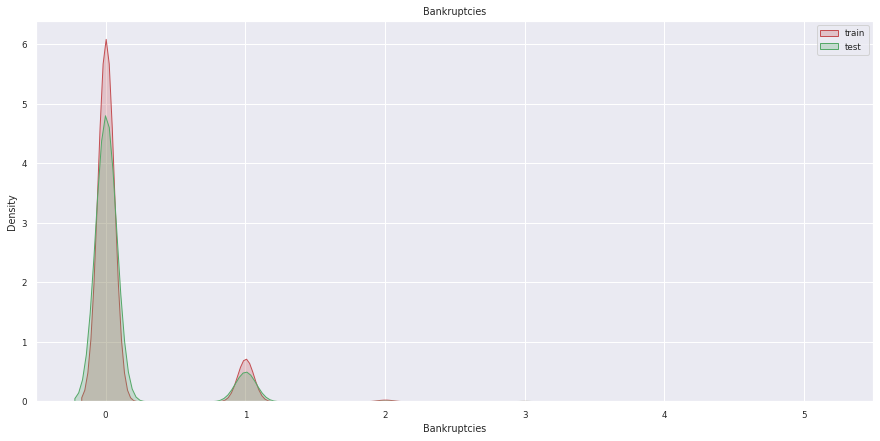

Current Loan Amount
MannwhitneyuResult(statistic=9230199.5, pvalue=0.12317435968682072)


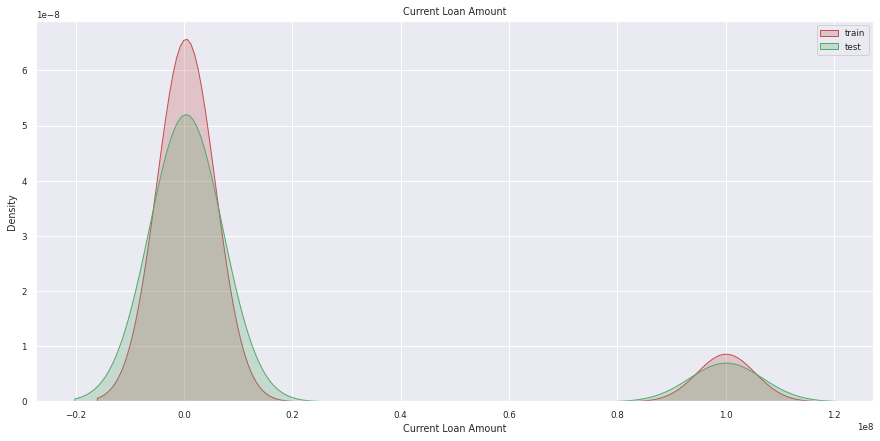

Current Credit Balance
MannwhitneyuResult(statistic=9334050.0, pvalue=0.3716147491364306)


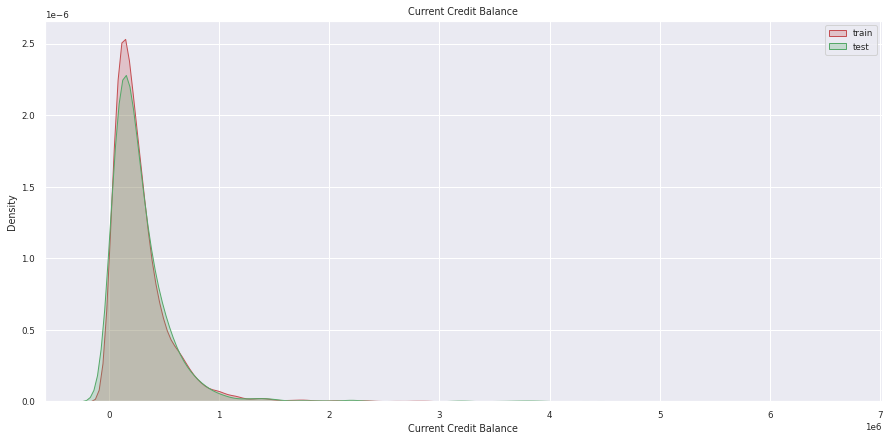

Monthly Debt
MannwhitneyuResult(statistic=9288187.0, pvalue=0.24369523330673137)


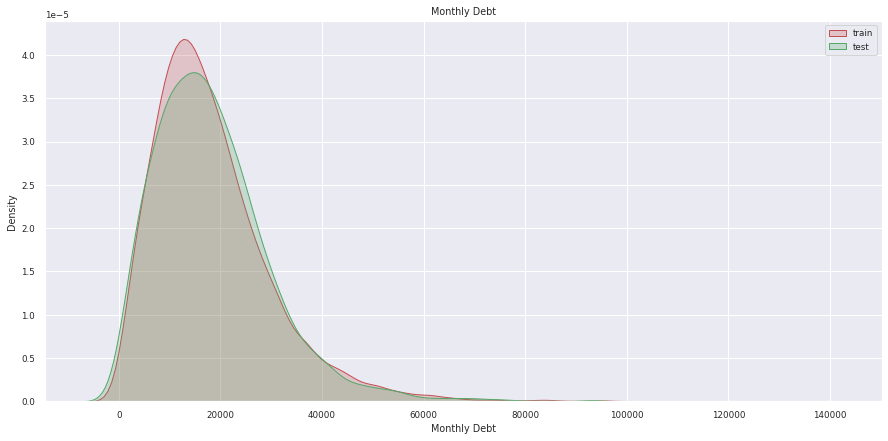

Credit Score
MannwhitneyuResult(statistic=9359581.5, pvalue=0.45091647518794764)


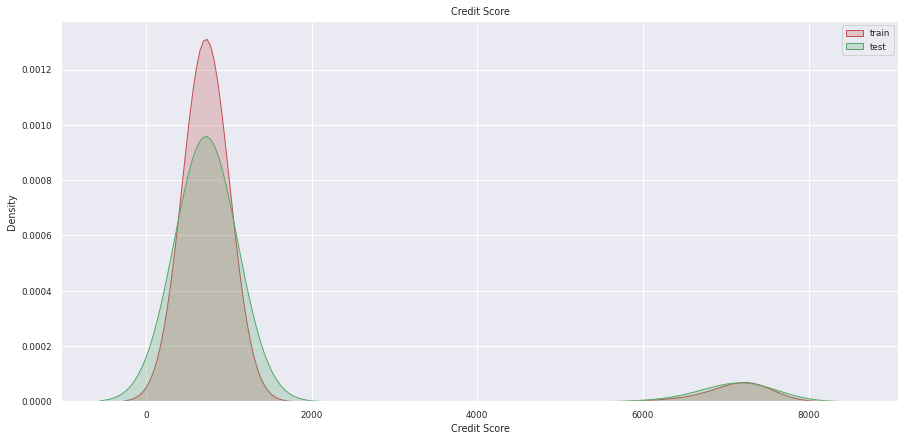

In [9]:
# –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å —á–∏—Å–ª–æ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
NUM_FEATURES = [column for column in train_data.columns if train_data[column].dtype != 'object']

figsize = (15, 7)
for col in NUM_FEATURES:
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    sns.kdeplot(train_data[col], shade=True, label='train', color='r')
    sns.kdeplot(test[col], shade=True, label='test', color='g')
    print(col)
    print(mannwhitneyu(train_data[col], test[col]))
    plt.legend(loc='upper right')
    plt.title(col)
    plt.show()

**–í—ã–≤–æ–¥**

–ü—Ä–∏–∑–Ω–∞–∫–∏ Months since last delinquent –∏ Bankruptcies –≤ –¥–≤—É—Ö –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö –∏–º–µ—é—Ç –Ω–∏–∑–∫—É—é —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç—å. –û—Å—Ç–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –ø–æ—Ö–æ–∂–∏–º –æ–±—Ä–∞–∑–æ–º –≤ –æ–±–æ–∏—Ö –≤—ã–±–æ—Ä–∫–∞—Ö.

## 2. –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –≤—ã–±—Ä–æ—Å—ã. –û–±—Ä–∞–±–æ—Ç–∫–∞ –≤—ã–±—Ä–æ—Å–æ–≤.

**–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π**

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.

In [10]:
def show_heatmap(data, title=None, figsize=(20, 15)):
    plt.figure(figsize=figsize)

    sns.heatmap(data, annot=True, linewidths=.5, cmap='GnBu')
    plt.title(title)
    plt.show()

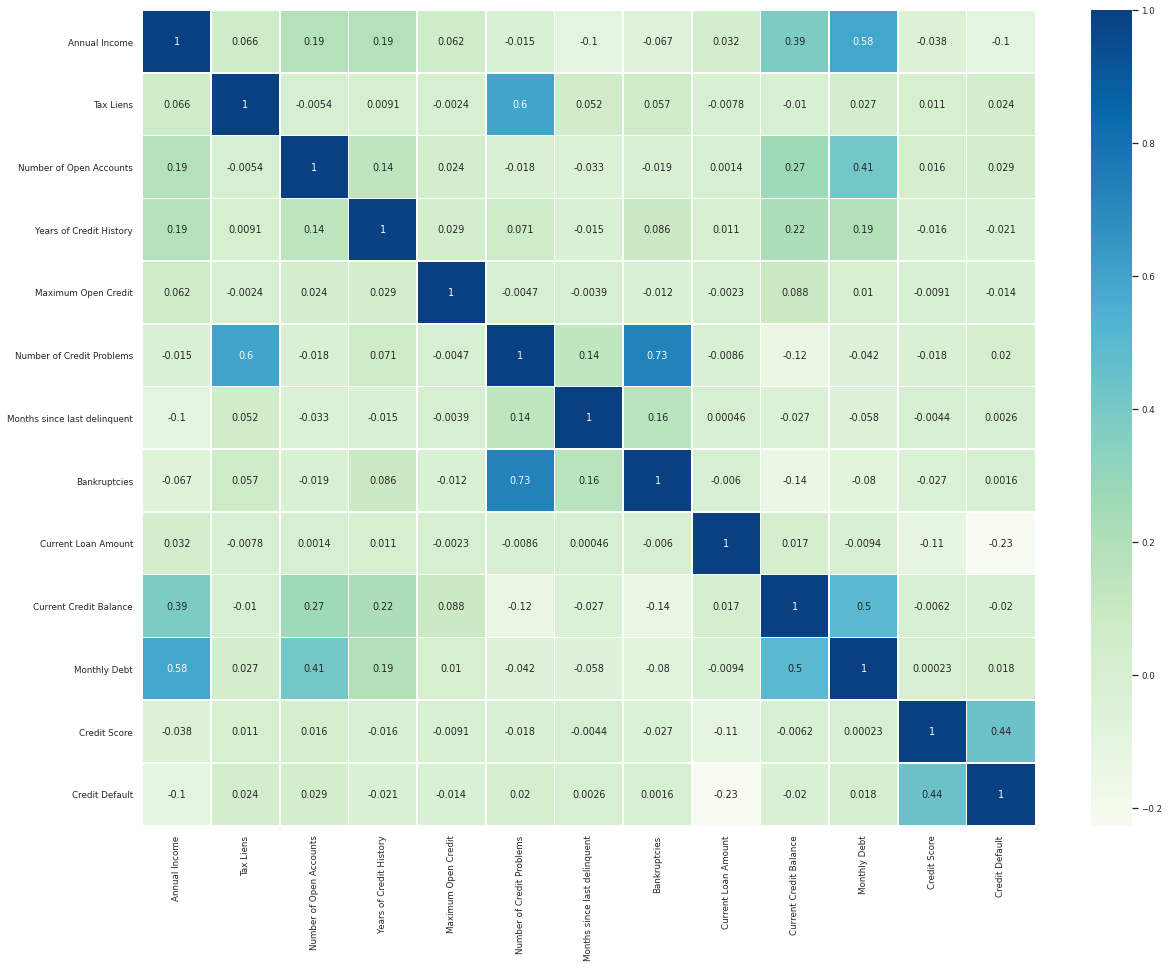

In [11]:
show_heatmap(train.corr().round(5))

–ù–∞–±–ª—é–¥–∞–µ—Ç—Å—è –≤—ã—Å–æ–∫–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è Credit Score —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (Credit Default). 

–ü–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –∏–∑ [—Å—Ç–∞—Ç—å–∏](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BA%D0%BE%D1%80%D0%B8%D0%BD%D0%B3) 

–í –°–®–ê –ø–æ–ø—É–ª—è—Ä–µ–Ω –≤–∏–¥ –∫—Ä–µ–¥–∏—Ç–Ω–æ–≥–æ —Å–∫–æ—Ä–∏–Ω–≥–∞ FICO score, –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è –æ—Ç 300 –¥–æ 850 –∏ 0. –ß–∞—Å—Ç–æ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—é—Ç –Ω–∞ –±–∞–∑–µ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∏—Å—Ç–æ—Ä–∏–∏ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª–µ–π, —Å–æ–±—Ä–∞–Ω–Ω–æ–π –≤ —Ç—Ä–µ—Ö –∫—Ä—É–ø–Ω–µ–π—à–∏—Ö –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã—Ö –±—é—Ä–æ: Experian, Equifax, –∏ TransUnion. –í–æ –≤–Ω–∏–º–∞–Ω–∏–µ –ø—Ä–∏–Ω–∏–º–∞—é—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–µ —Å–æ—Å—Ç–∞–≤–ª—è—é—â–∏–µ: –∫–∞—á–µ—Å—Ç–≤–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∏—Å—Ç–æ—Ä–∏–∏, –Ω–∞–ª–∏—á–∏–µ –∏ —Ä–∞–∑–º–µ—Ä —Ç–µ–∫—É—â–∏—Ö –¥–æ–ª–≥–æ–≤, –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –æ—Ç–Ω–æ—à–µ–Ω–∏–π —Å –∫—Ä–µ–¥–∏—Ç–æ—Ä–∞–º–∏, —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–æ–¥–∞–Ω–Ω—ã—Ö –∑–∞—è–≤–æ–∫ –∏ –≤—ã–¥–∞–Ω–Ω—ã—Ö –∫—Ä–µ–¥–∏—Ç–æ–≤, —Ç–∏–ø—ã –≤—ã–¥–∞–Ω–Ω—ã—Ö –∫—Ä–µ–¥–∏—Ç–æ–≤. –ó–∞—ë–º—â–∏–∫ –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å —ç—Ç–∏–º –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç—Å—è:

* –≤—ã—à–µ 790 ‚Äî ¬´–≤–µ–ª–∏–∫–æ–ª–µ–ø–Ω–æ¬ª
* 750‚Äî790 ‚Äî —Å—Ä–µ–¥–Ω–∏–π —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å
* 740‚Äî750 ‚Äî ¬´–æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–æ¬ª
* 720‚Äî740 ‚Äî ¬´—Ö–æ—Ä–æ—à–æ¬ª
* 700‚Äî720 ‚Äî ¬´–ø–ª–æ—Ö–æ¬ª
* –Ω–∏–∂–µ 700 ‚Äî ¬´–æ—á–µ–Ω—å –ø–ª–æ—Ö–æ¬ª

–°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ –¥–æ–ª–∂–Ω–∞ –Ω–∞–±–ª—é–¥–∞—Ç—å—Å—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫ Credit Score.

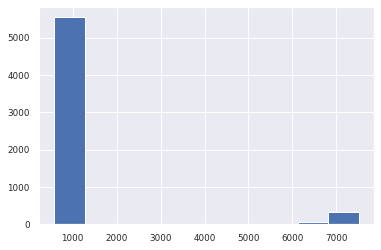

In [12]:
train['Credit Score'].hist()
plt.show()

–ü–æ—Ö–æ–∂–µ, —á—Ç–æ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤—ã–±—Ä–æ—Å—ã.

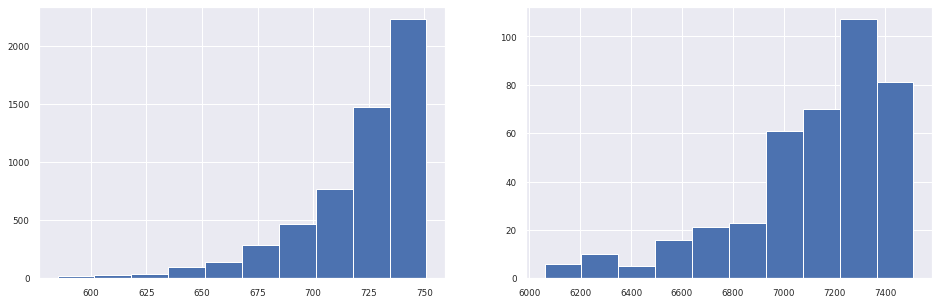

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2)

fig.set_size_inches(16, 5)

ax[0].hist(train[train['Credit Score'] < 1e3]['Credit Score'])
ax[1].hist(train[train['Credit Score'] > 1e3]['Credit Score'])
plt.show()

–ü–æ—Ö–æ–∂–µ, —á—Ç–æ —É —á–∞—Å—Ç–∏ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –∑–Ω–∞—á–µ–Ω–∏–µ Credit Score –≤—ã—à–µ –Ω–∞ –ø–æ—Ä—è–¥–æ–∫. –ü—Ä–∏ —ç—Ç–æ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–∏. –ü—Ä–æ–≤–µ—Ä–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ü–µ–ª–µ–≤—ã—Ö –º–µ—Ç–æ–∫ –¥–ª—è –∫–∞–∂–¥–æ–π –∏–∑ —ç—Ç–∏—Ö –≥—Ä—É–ø–ø.

In [14]:
train[train['Credit Score'] < 1e3]['Credit Default'].value_counts()

0    4359
1    1184
Name: Credit Default, dtype: int64

In [15]:
train[train['Credit Score'] > 1e3]['Credit Default'].value_counts()

1    400
Name: Credit Default, dtype: int64

–ü–æ—Ö–æ–∂–µ, —á—Ç–æ –≤—Å–µ–º –Ω–∞–±–ª—é–¥–µ–Ω–∏—è–º —Å –∑–∞–≤—ã—à–µ–Ω–Ω—ã–º Credit Score –ø—Ä–∏—Å–≤–æ–µ–Ω –ø–µ—Ä–≤—ã–π –∫–ª–∞—Å—Å (–Ω–µ–≤–æ–∑–≤—Ä–∞—Ç –∫—Ä–µ–¥–∏—Ç–∞). –ò–∑-–∑–∞ —ç—Ç–æ–≥–æ –∏ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

–í–æ–∑–º–æ–∂–Ω–æ –∏–∑ —ç—Ç–æ–≥–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –¥–æ–ø –ø—Ä–∏–∑–Ω–∞–∫, –Ω–æ –ø–æ—Å–∫–æ–ª—å–∫—É –Ω–∞–º –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ, –∫–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –∫–ª–∞—Å—Å—ã –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö, —Ç–æ –ª—É—á—à–µ –≤—Å–µ–≥–æ –ø—Ä–æ—Å—Ç–æ –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ - —É–º–µ–Ω—å—à–∏—Ç—å –Ω–∞ –ø–æ—Ä—è–¥–æ–∫ –∑–∞–≤—ã—à–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.

–í—Å–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è –±—É–¥—É—Ç –∑–∞–ø–∏—Å—ã–≤–∞—Ç—å—Å—è –≤ –Ω–æ–≤—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º, —Å—Ç–∞—Ä—ã–π –æ—Å—Ç–∞–Ω–µ—Ç—Å—è –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π.

In [16]:
prep = train.copy()

prep.loc[prep['Credit Score'] > 1e3, 'Credit Score'] //= 10

–ü—Ä–æ–≤–µ—Ä–∫–∞ - –∫–∞–∫ –∏–∑–º–µ–Ω–∏–ª–∞—Å—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

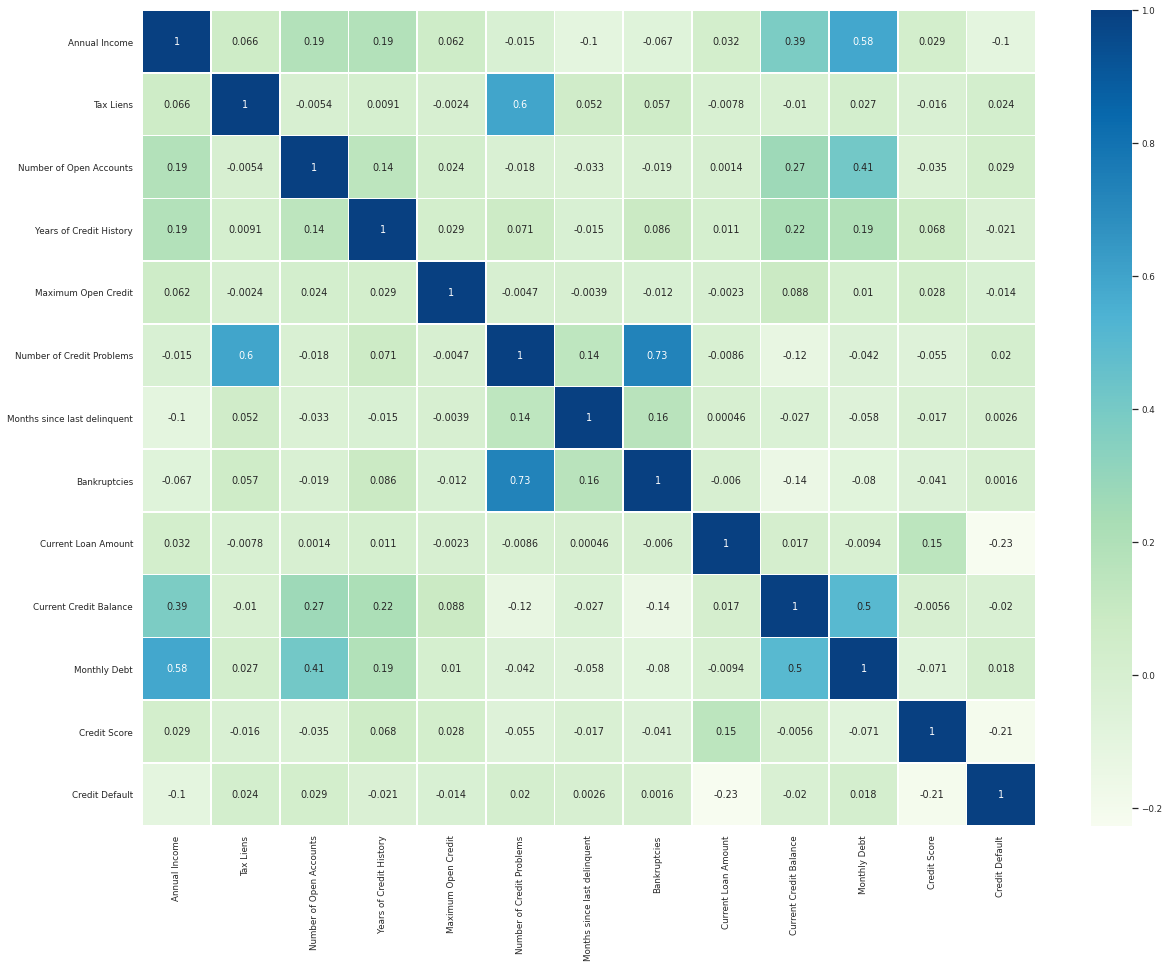

In [17]:
show_heatmap(prep.corr().round(5))

–ü–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, —á—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç—É–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É —Å–∫–æ—Ä–∏–Ω–≥—É.

–ü–æ –ø—Ä–∏–∑–Ω–∞–∫—É Credit Score —É —á–∞—Å—Ç–∏ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –≤ –æ–±–µ–∏—Ö –≤—ã–±–æ—Ä–∫–∞—Ö –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –∑–Ω–∞—á–µ–Ω–∏—è. –ü—Ä–∏–∑–Ω–∞–∫ –∏–º–µ–µ—Ç –¥–æ–≤–æ–ª—å–Ω–æ –≤—ã—Å–æ–∫—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –î–æ —Ç–µ—Ö –ø–æ—Ä –ø–æ–∫–∞ –Ω–µ –ø–æ–ª—É—á–∏–º –±–æ–ª—å—à–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ - –æ—Å—Ç–∞–≤–ª—è–µ–º –∫–∞–∫ –µ—Å—Ç—å.

–ü—Ä–æ–≤–µ—Ä–∏–º –æ—Å—Ç–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ –≤—ã–±—Ä–æ—Å—ã

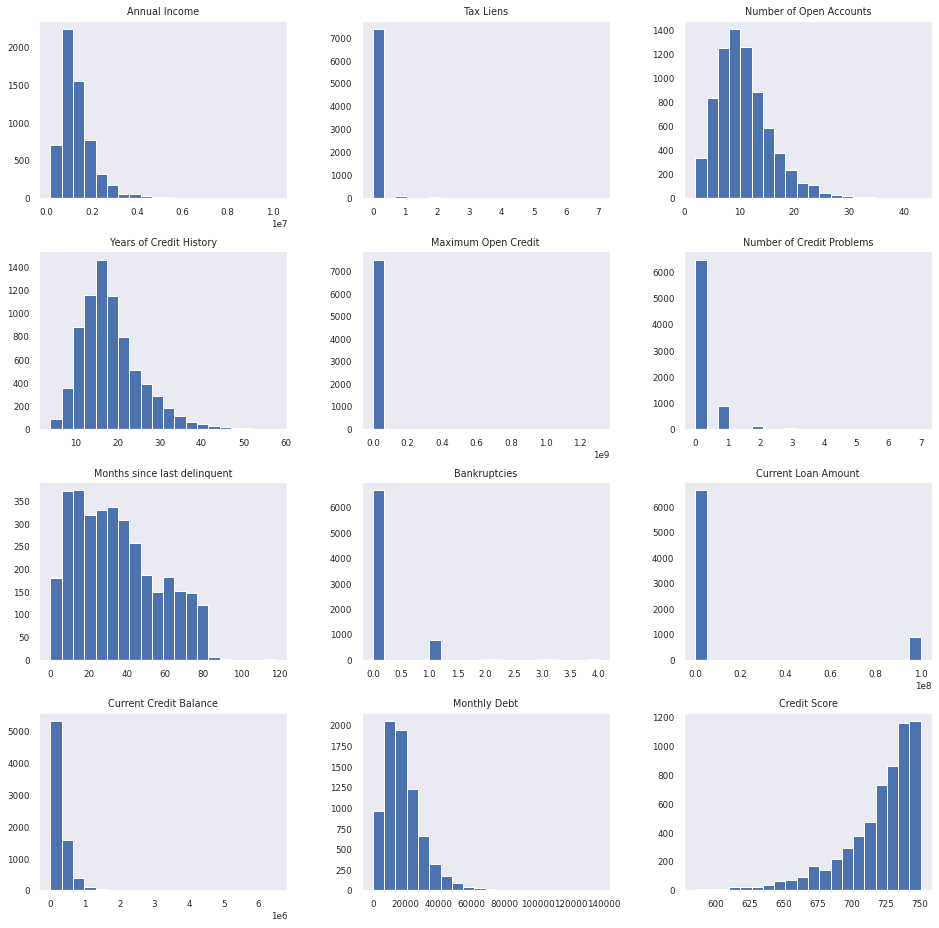

In [18]:
prep_data = prep.drop(TARGET, axis=1)

prep_data.hist(figsize=(16,16), bins=20, grid=False)
plt.show()

–í –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö 'Current Loan Amount' –∏ 'Maximum Open Credit' –≤–µ—Ä–æ—è—Ç–Ω–æ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤—ã–±—Ä–æ—Å—ã.

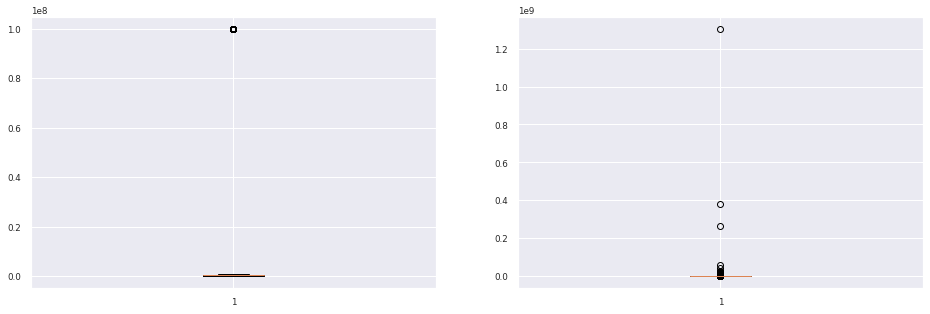

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2)

fig.set_size_inches(16, 5)

ax[0].boxplot(prep['Current Loan Amount'])
ax[1].boxplot(prep['Maximum Open Credit'])
plt.show()

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ - –∫–∞–∫ —Å–≤—è–∑–∞–Ω—ã –¥–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.

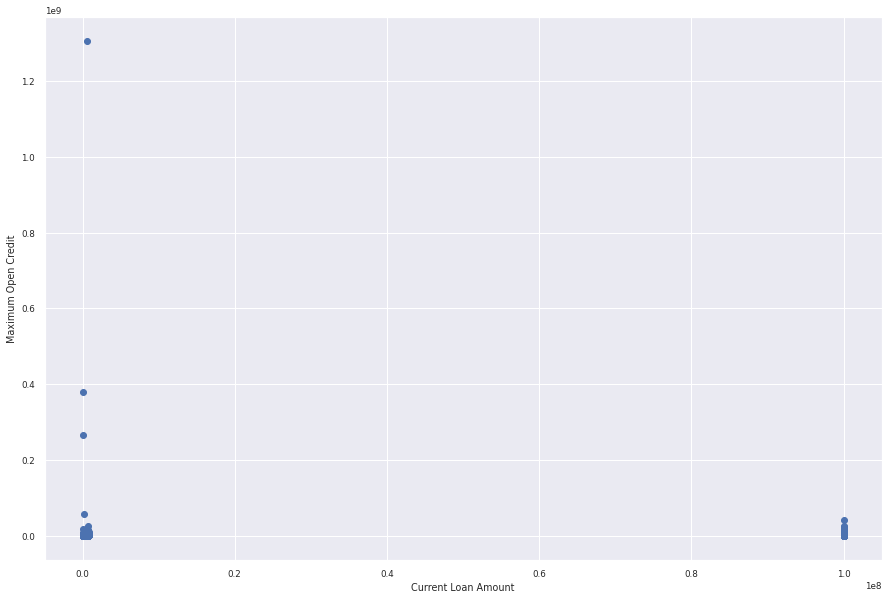

In [21]:
plt.figure(figsize=(15, 10))

plt.scatter(prep['Current Loan Amount'], prep['Maximum Open Credit'])
plt.xlabel('Current Loan Amount')
plt.ylabel('Maximum Open Credit')
plt.show()

–ù–∞–±–ª—é–¥–µ–Ω–∏—è c –≤—ã—Å–æ–∫–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –≤ –æ–¥–Ω–æ–º –ø—Ä–∏–∑–Ω–∞–∫–µ –∏–º–µ—é—Ç –Ω–µ–≤—ã—Å–æ–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –¥—Ä—É–≥–æ–º. –ü–æ—Ö–æ–∂–µ, —á—Ç–æ —ç—Ç–æ –≤—ã–±—Ä–æ—Å—ã.

* Maximum Open Credit - –Ω–∞–∏–±–æ–ª—å—à–∏–π –æ—Ç–∫—Ä—ã—Ç—ã–π –∫—Ä–µ–¥–∏—Ç
* Current Loan Amount - —Ç–µ–∫—É—â–∞—è —Å—É–º–º–∞ –∫—Ä–µ–¥–∏—Ç–∞

–û—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ —Ç–µ–∫—É—â–∞—è —Å—É–º–º–∞ –∫—Ä–µ–¥–∏—Ç–∞ –Ω–µ –º–æ–∂–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–µ–≤—ã—à–∞—Ç—å –Ω–∞–∏–±–æ–ª—å—à–∏–π –æ—Ç–∫—Ä—ã—Ç—ã–π –∫—Ä–µ–¥–∏—Ç. –î–∞–∂–µ —Å —É—á–µ—Ç–æ–º –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤ –ø–æ –∫—Ä–µ–¥–∏—Ç—É.

–í—ã–±—Ä–æ—Å—ã –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É 'Current Loan Amount' –∑–∞–º–µ–Ω–∏–º –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ 'Maximum Open Credit'.

In [22]:
prep.loc[
    prep['Current Loan Amount'] > 9e7, 
    'Current Loan Amount'] = \
prep[prep['Current Loan Amount'] > 9e7]['Maximum Open Credit']

–ü—Ä–∏–∑–Ω–∞–∫ 'Maximum Open Credit' –æ—Å—Ç–∞–≤–ª—è–µ–º –∫–∞–∫ –µ—Å—Ç—å, —Ç.–∫. —Å—É–º–º–∞ –∫—Ä–µ–¥–∏—Ç–∞ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –±–æ–ª—å—à–æ–π, –µ—Å–ª–∏ —ç—Ç–æ, –∫ –ø—Ä–∏–º–µ—Ä—É –∏–ø–æ—Ç–µ–∫–∞.

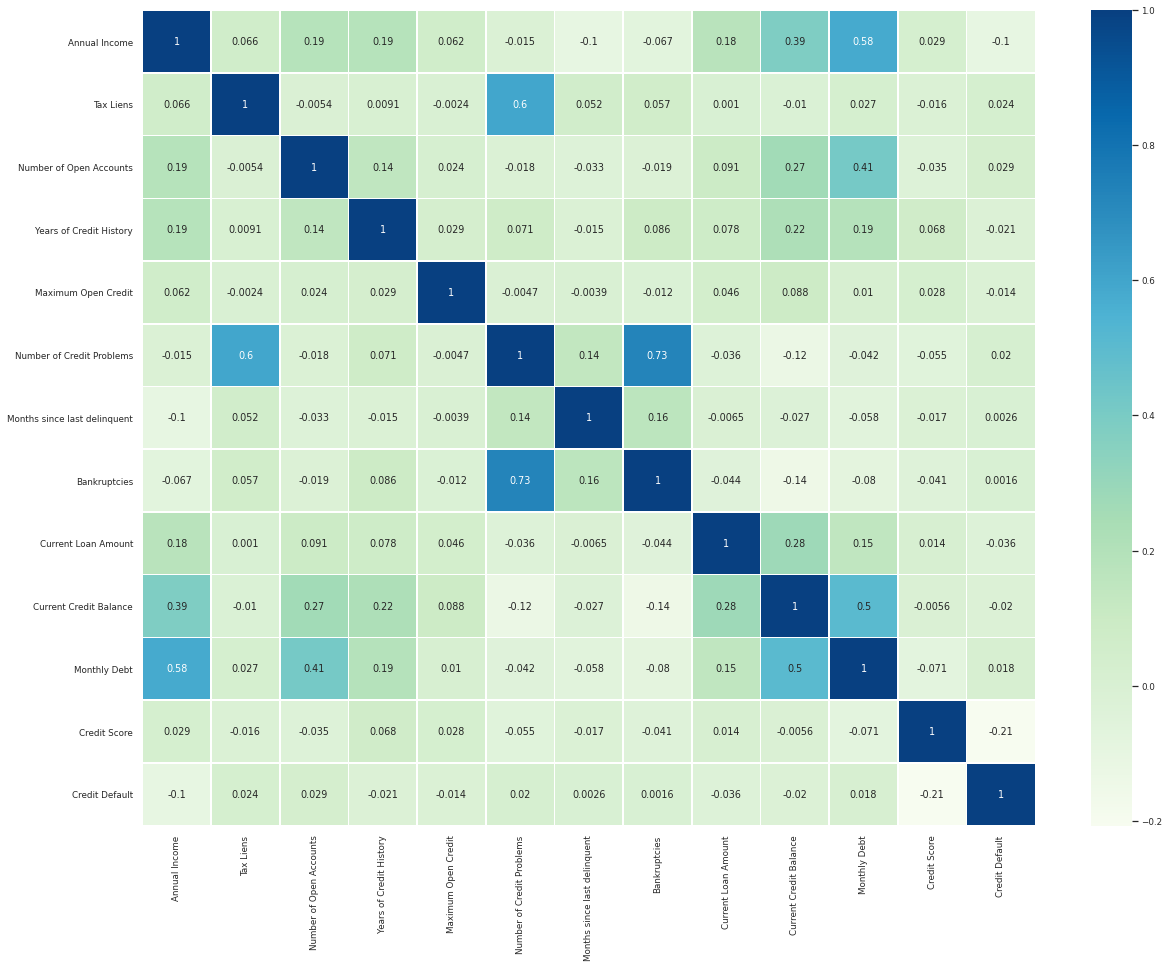

In [23]:
show_heatmap(prep.corr().round(5))

–£–≤–µ–ª–∏—á–∏–ª–∞—Å—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è 'Current Loan Amount' —Å 'Current Credit Balance' –∏ 'Annual Income'. –ù–æ —Å–Ω–∏–∑–∏–ª–∞—Å—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å 'Credit Score'. –í–µ—Ä–æ—è—Ç–Ω–æ –æ–Ω–∞ –Ω–∞–±–ª—é–¥–∞–ª–∞—Å—å –∏–∑-–∑–∞ –∏–º–µ–≤—à–∏—Ö—Å—è –≤—ã–±—Ä–æ—Å–æ–≤.

## 3. –ò–∑—É—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.

In [24]:
prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

### 3.1 Bankruptcies

–ü–æ –ø—Ä–∏–∑–Ω–∞–∫—É 'Bankruptcies' –µ—Å—Ç—å –Ω–µ–º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤. –ó–∞–ø–æ–ª–Ω–∏–º –º–æ–¥–æ–π.

In [25]:
prep['Bankruptcies'].fillna(prep['Bankruptcies'].mode().values[0], inplace=True)

### 3.2 Months since last delinquent

–ü–æ –ø—Ä–∏–∑–Ω–∞–∫—É 'Months since last delinquent' –±–æ–ª–µ–µ –ø–æ–ª–æ–≤–∏–Ω—ã –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π. –¢.–∫. –≤ –æ–±—É—á–∞—é—â–µ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∞—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ —ç—Ç–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è, —Ç–æ –¥–∞–Ω–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ —Ü–µ–ª–µ—Å–æ–æ–±—Ä–∞–∑–Ω–µ–µ –≤—Å–µ–≥–æ —É–±—Ä–∞—Ç—å.  

In [26]:
prep = prep.drop('Months since last delinquent', axis=1)

In [27]:
prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             7500 non-null   object 
 1   Annual Income              5943 non-null   float64
 2   Years in current job       7129 non-null   object 
 3   Tax Liens                  7500 non-null   float64
 4   Number of Open Accounts    7500 non-null   float64
 5   Years of Credit History    7500 non-null   float64
 6   Maximum Open Credit        7500 non-null   float64
 7   Number of Credit Problems  7500 non-null   float64
 8   Bankruptcies               7500 non-null   float64
 9   Purpose                    7500 non-null   object 
 10  Term                       7500 non-null   object 
 11  Current Loan Amount        7500 non-null   float64
 12  Current Credit Balance     7500 non-null   float64
 13  Monthly Debt               7500 non-null   float

### 3.3 Annual Income –∏ Years in current job

–ü–æ –ø—Ä–∏–∑–Ω–∞–∫—É 'Annual Income' (–ì–æ–¥–æ–≤–æ–π –¥–æ—Ö–æ–¥) –º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π. –í–æ–∑–º–æ–∂–Ω–æ –¥–æ—Ö–æ–¥ —Å–≤—è–∑–∞–Ω —Å –ø—Ä–∏–∑–Ω–∞–∫–æ–º 'Years in current job' (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–µ—Ç –Ω–∞ —Ç–µ–∫—É—â–µ–π —Ä–∞–±–æ—Ç–µ). 

–ü–æ –ø—Ä–∏–∑–Ω–∞–∫—É 'Years in current job' —É –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –æ—Ç—Å—É—Ç—Å—Ç—É—é—Ç –∑–Ω–∞—á–µ–Ω–∏—è. 

In [28]:
prep['Years in current job'].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

–°—Ä–∞–≤–Ω–∏–º –≥–æ–¥–æ–≤–æ–π –¥–æ—Ö–æ–¥ –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞ 'Years in current job'. –¢–∞–∫–∂–µ –ø—Ä–∏—Å–≤–æ–∏–º –∫–∞—Ç–µ–≥–æ—Ä–∏—é –¥–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ. –ï—Å—Ç—å –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ, —á—Ç–æ –∑–Ω–∞—á–µ–Ω–∏—è –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç, –ø–æ—Å–∫–æ–ª—å–∫—É –¥–∞–Ω–Ω—ã–µ –ª—é–¥–∏ –≤ –Ω–∞—Å—Ç–æ—è—â–∏–π –º–æ–º–µ–Ω—Ç –Ω–µ —Ç—Ä—É–¥–æ—É—Å—Ç—Ä–æ–µ–Ω—ã.

In [29]:
prep['Years in current job'].fillna('N/A', inplace=True)

In [30]:
def show_pointplot(x, y, data, figsize=(15, 8)):
    plt.figure(figsize=figsize)
    
    sns.pointplot(x=x, y=y, data=prep, capsize=.1)

    plt.title(f'Confidence intervals (95 %) for {y}')
    plt.show()

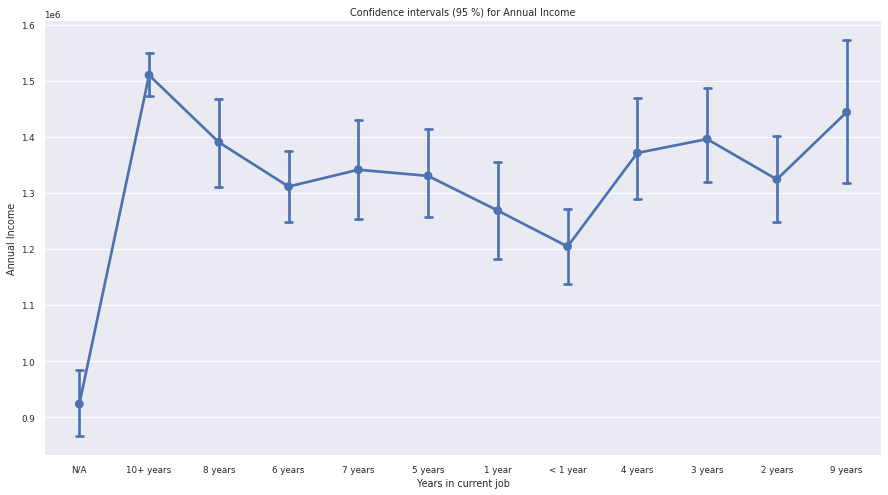

In [31]:
show_pointplot('Years in current job', 'Annual Income', prep)

–ü–æ—Ö–æ–∂–µ, —á—Ç–æ –ø–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è–º —Å –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ 'Years in current job' –≥–æ–¥–æ–≤–æ–π –¥–æ—Ö–æ–¥ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –Ω–∏–∂–µ. 

–ü–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –ø—Ä–∏–∑–Ω–∞–∫–∞ 'Years in current job' —Å –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –µ—Å—Ç—å –Ω–µ–±–æ–ª—å—à–∏–µ —Ä–∞–∑–ª–∏—á–∏—è –≥–æ–¥–æ–≤–æ–≥–æ –¥–æ—Ö–æ–¥–∞. –ó–∞–ø–æ–ª–Ω–∏–º –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≥–æ–¥–æ–≤–æ–≥–æ –¥–æ—Ö–æ–¥–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º–∏ –º–µ–¥–∏–∞–Ω–∞–º–∏.

In [32]:
years_categories = prep['Years in current job'].unique()

for cat in years_categories:
    prep.loc[(prep['Annual Income'].isnull()) & 
             (prep['Years in current job'] == cat), 
             'Annual Income'] = \
    prep[prep['Years in current job'] == cat]['Annual Income'].median()

–ü—Ä–æ–¥–æ–ª–∂–∏–º –∏–∑—É—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ 'Years in current job'. –ü—Ä–æ–≤–µ–¥–µ–º –æ—Ü–µ–Ω–∫—É –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ —Ä–∞–∑—Ä–µ–∑–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. 

In [33]:
def show_countplot(x, hue, data, title=None, figsize=(10, 8)):
    plt.figure(figsize=figsize)

    sns.countplot(x=x, hue=hue, data=data)
    plt.title(f'{x} grouped by {hue}')
    plt.legend(title=title, loc='upper right')

    plt.show()

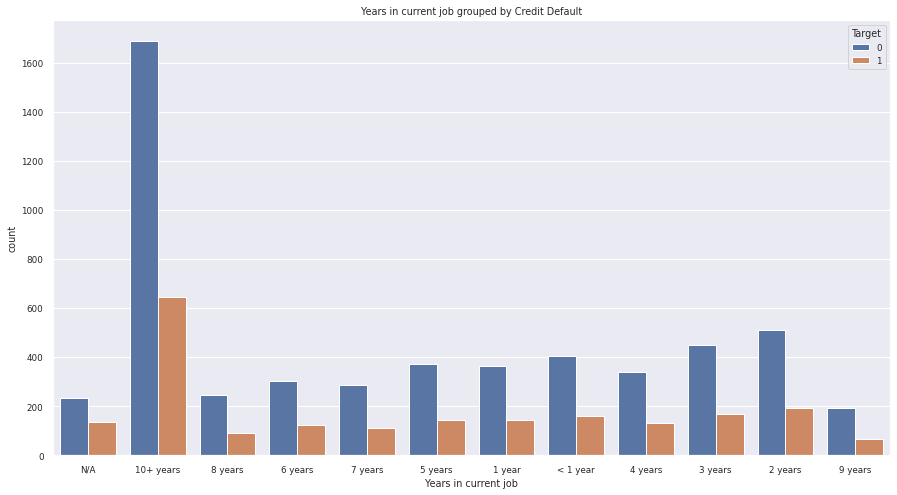

In [34]:
show_countplot('Years in current job', 'Credit Default', prep, title='Target', figsize=(15, 8))

–ü–æ –≥—Ä–∞—Ñ–∏–∫—É –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Å—Ö–æ–∂–µ—Å—Ç—å –¥–æ–ª–µ–π –≤ —Ä–∞–∑—Ä–µ–∑–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –¥–ª—è –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É. –î–ª—è –æ—Ç—Å—Ç—É—Ç—Å—Ç–≤—É—é—â–∏—Ö, –Ω–∞–ø—Ä–æ—Ç–∏–≤ - –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Ä–∞–∑–ª–∏—á–∏–µ —Å –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏. –ü—Ä–æ–≤–µ—Ä–∏–º, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–µ –¥–∞–Ω–Ω–æ–µ —Ä–∞–∑–ª–∏—á–∏–µ. 

**–ì–∏–ø–æ—Ç–µ–∑–∞** 

* –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –æ–∂–∏–¥–∞–µ–º—ã–µ –∏ –Ω–∞–±–ª—é–¥–∞–µ–º—ã–µ —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã –¥–ª—è –≤—Å–µ—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π –ø—Ä–∏–∑–Ω–∞–∫–∞
* –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –≤ —á–∞—Å—Ç–æ—Ç–∞—Ö –≤—ã—Ö–æ–¥—è—Ç –∑–∞ —Ä–∞–º–∫–∏ —Å–ª—É—á–∞–π–Ω—ã—Ö –∫–æ–ª–µ–±–∞–Ω–∏–π, —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã
* –ö—Ä–∏—Ç–µ—Ä–∏–π: –•–∏-–∫–≤–∞–¥—Ä–∞—Ç –ü–∏—Ä—Å–æ–Ω–∞
* –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ $\alpha$: 0.05
* –ö—Ä–∏—Ç–∏—á–µ—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å: –¥–≤—É—Ö—Å—Ç–æ—Ä–æ–Ω–Ω—è—è

–î–ª—è –±—ã—Å—Ç—Ä–æ–π –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑—ã –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —Å–ª–µ–¥—É—é—â–µ–π —Ñ—É–Ω–∫—Ü–∏–µ–π.

In [35]:
def p_values_matrix(X, feature_name, target_name):
    '''–§—É–Ω–∫—Ü–∏—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –¥–∞—Ç–∞—Ñ—Ä–µ–π–º, –≥–¥–µ –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º –∏ —Å—Ç—Ä–æ–∫–∞–º –≤—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞.
    –ù–∞ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω—ã–π p-value –ø–æ –∫—Ä–∏—Ç–µ—Ä–∏—é –•–∏-–∫–≤–∞–¥—Ä–∞—Ç –ü–∏—Ä—Å–æ–Ω–∞ 
    –ø–æ –Ω–∞–±–ª—é–¥–∞–µ–º—ã–º —á–∞—Å—Ç–æ—Ç–∞–º –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –¥–ª—è —ç—Ç–∏—Ö –¥–≤—É—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π.'''
    df = X.copy()
    unique_cats = df[feature_name].unique()
    
    arr = np.eye(unique_cats.shape[0])
    
    for i, cat_1 in enumerate(unique_cats):
        for j, cat_2 in enumerate(unique_cats[i+1:]):
            j += i+1
            
            feature_and_target = df.loc[df[feature_name].isin([cat_1, cat_2]), [feature_name, target_name]]
            feature_and_target['Id'] = feature_and_target.index
            table = feature_and_target.pivot_table(values='Id', index=feature_name, columns=target_name, aggfunc='count')
            _, p, _, _ = chi2_contingency(table)
            
            arr[i, j] = p
            arr[j, i] = p
    return pd.DataFrame(arr, columns=unique_cats, index=unique_cats)

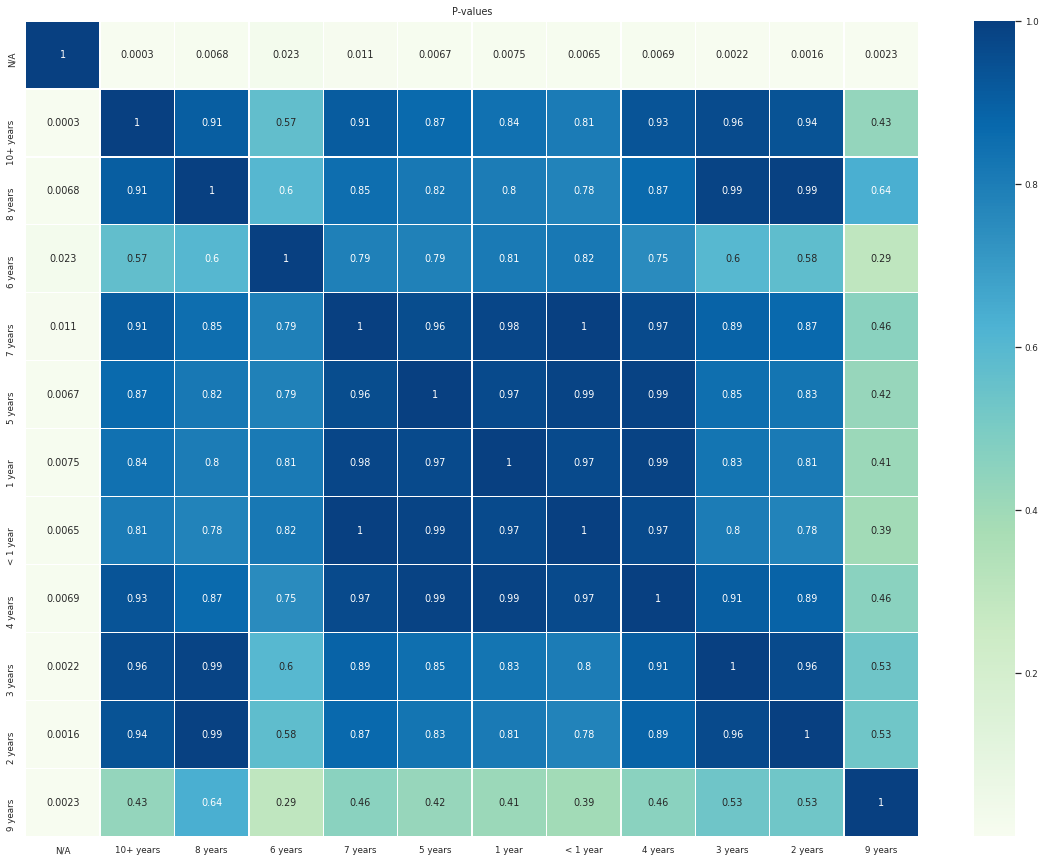

In [36]:
p_values = p_values_matrix(prep, 'Years in current job', 'Credit Default')

show_heatmap(p_values.round(5), title='P-values')

**–í—ã–≤–æ–¥**

–†–∞–∑–ª–∏—á–∏—è –Ω–∞–±–ª—é–¥–∞–µ–º—ã—Ö —á–∞—Å—Ç–æ—Ç —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –Ω–µ —è–≤–ª—è—é—Ç—Å—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–º–∏ –¥–ª—è –Ω–∞–±–ª—é–¥–µ–Ω–∏–π —Å –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞. –ü—Ä–∏ —ç—Ç–æ–º —Ä–∞–∑–ª–∏—á–∏–µ –º–µ–∂–¥—É –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–º–∏ –∏ –Ω–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ —è–≤–ª—è–µ—Ç—Å—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–º. –ü—Ä–∏–∑–Ω–∞–∫ –∏–∑ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–≥–æ –º–æ–∂–Ω–æ –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ –±–∏–Ω–∞—Ä–Ω–æ–º—É –≤–∏–¥—É. –ì–¥–µ –∑–Ω–∞—á–µ–Ω–∏—è: 1 - –Ω–µ —Ç—Ä—É–¥–æ—É—Å—Ç—Ä–æ–µ–Ω, 0 - —Ç—Ä—É–¥–æ—É—Å—Ç—Ä–æ–µ–Ω

In [37]:
prep.rename(columns={'Years in current job': 'is_unemployed'}, inplace=True)
prep['is_unemployed'] = (prep['is_unemployed'] == 'N/A').astype('uint8')

In [38]:
prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             7500 non-null   object 
 1   Annual Income              7500 non-null   float64
 2   is_unemployed              7500 non-null   uint8  
 3   Tax Liens                  7500 non-null   float64
 4   Number of Open Accounts    7500 non-null   float64
 5   Years of Credit History    7500 non-null   float64
 6   Maximum Open Credit        7500 non-null   float64
 7   Number of Credit Problems  7500 non-null   float64
 8   Bankruptcies               7500 non-null   float64
 9   Purpose                    7500 non-null   object 
 10  Term                       7500 non-null   object 
 11  Current Loan Amount        7500 non-null   float64
 12  Current Credit Balance     7500 non-null   float64
 13  Monthly Debt               7500 non-null   float

–ü—Ä–æ–¥–æ–ª–∂–∏–º –∏–∑—É—á–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

### 3.4 Home Ownership

In [39]:
prep['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

–í –ø—Ä–∏–∑–Ω–∞–∫–µ –¥–≤–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Å –∏–ø–æ—Ç–µ–∫–æ–π - 'Home Mortgage' –∏ 'Have Mortgage'. –ù–∞–±–ª—é–¥–µ–Ω–∏–π —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–µ–π 'Have Mortgage' –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ, –ø—Ä–∏—Å–≤–æ–∏–º –∏–º –∫–∞—Ç–µ–≥–æ—Ä–∏—é 'Home Mortgage'.

In [40]:
prep.loc[prep['Home Ownership'] == 'Have Mortgage', 'Home Ownership'] = 'Home Mortgage'

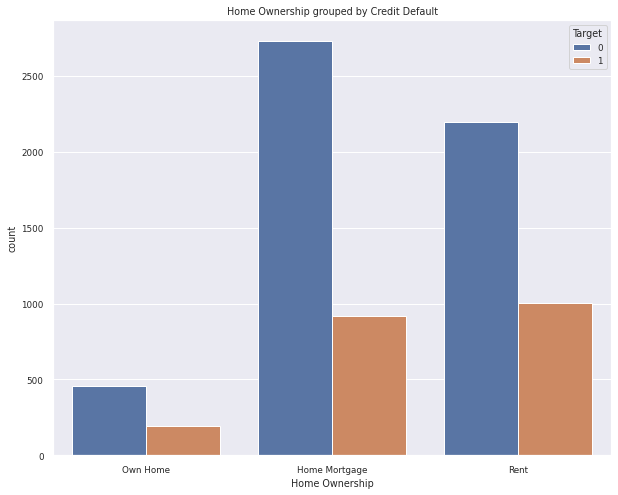

In [41]:
show_countplot('Home Ownership', 'Credit Default', prep, title='Target')

–ü–æ –≥—Ä–∞—Ñ–∏–∫—É –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è —Ä–∞–∑–ª–∏—á–∏—è –¥–æ–ª–µ–π –≤ —Ä–∞–∑—Ä–µ–∑–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ. –ü—Ä–æ–≤–µ—Ä–∏–º, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã –¥–∞–Ω–Ω—ã–µ —Ä–∞–∑–ª–∏—á–∏—è. 

**–ì–∏–ø–æ—Ç–µ–∑–∞** 

* –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –æ–∂–∏–¥–∞–µ–º—ã–µ –∏ –Ω–∞–±–ª—é–¥–∞–µ–º—ã–µ —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã –¥–ª—è –≤—Å–µ—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π –ø—Ä–∏–∑–Ω–∞–∫–∞
* –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –≤ —á–∞—Å—Ç–æ—Ç–∞—Ö –≤—ã—Ö–æ–¥—è—Ç –∑–∞ —Ä–∞–º–∫–∏ —Å–ª—É—á–∞–π–Ω—ã—Ö –∫–æ–ª–µ–±–∞–Ω–∏–π, —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã
* –ö—Ä–∏—Ç–µ—Ä–∏–π: –•–∏-–∫–≤–∞–¥—Ä–∞—Ç –ü–∏—Ä—Å–æ–Ω–∞
* –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ $\alpha$: 0.05
* –ö—Ä–∏—Ç–∏—á–µ—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å: –¥–≤—É—Ö—Å—Ç–æ—Ä–æ–Ω–Ω—è—è

–í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —Ñ—É–Ω–∫—Ü–∏–µ–π –Ω–∞–ø–∏—Å–∞–Ω–Ω–æ–π —Ä–∞–Ω–µ–µ.

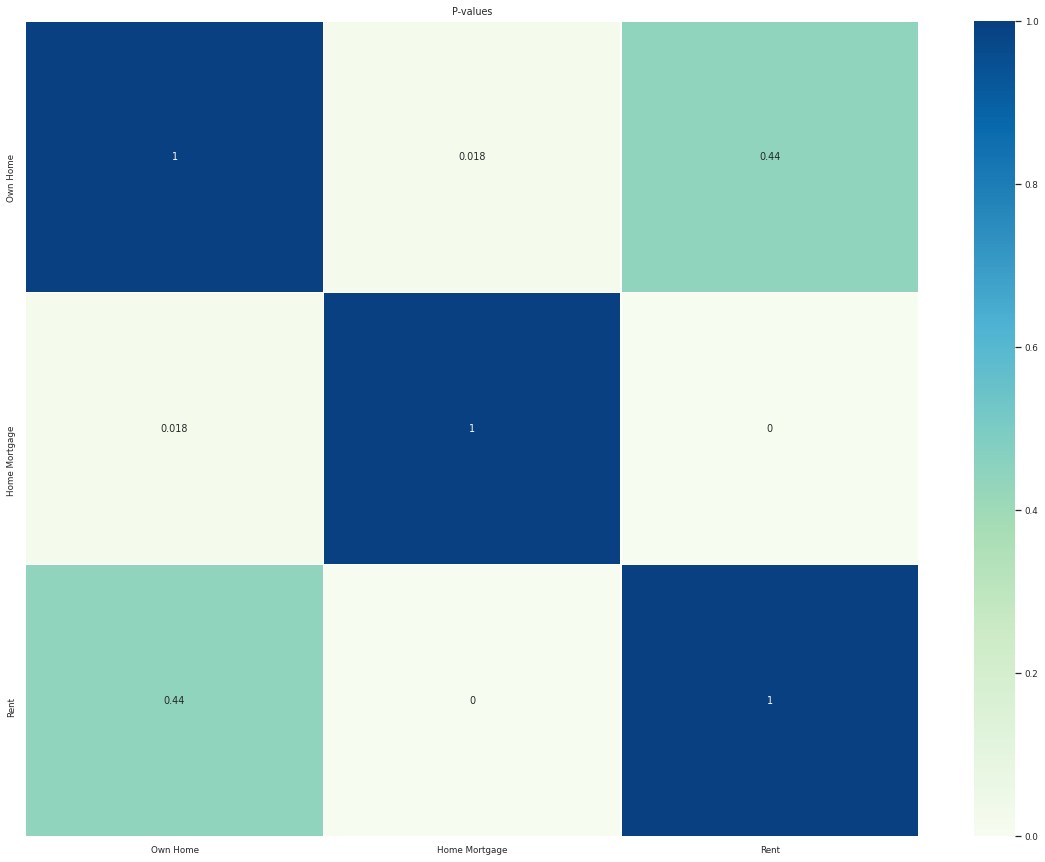

In [42]:
p_values = p_values_matrix(prep, 'Home Ownership', 'Credit Default')

show_heatmap(p_values.round(5), title='P-values')

**–í—ã–≤–æ–¥**

–†–∞–∑–ª–∏—á–∏—è –Ω–∞–±–ª—é–¥–∞–µ–º—ã—Ö —á–∞—Å—Ç–æ—Ç —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π —É –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ 'Home Mortgage' —Å –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞ —è–≤–ª—è—é—Ç—Å—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–º–∏. 

–†–∞–∑–ª–∏—á–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π 'Own Home' –∏ 'Rent' –Ω–µ —è–≤–ª—è–µ—Ç—Å—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–º.

–ù–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —Ç–æ —á—Ç–æ —Ä–∞–∑–ª–∏—á–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π 'Own Home' –∏ 'Rent' –Ω–µ —è–≤–ª—è–µ—Ç—Å—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–º, –æ—Å—Ç–∞–≤–∏–º –¥–∞–Ω–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π.

### 3.5 Purpose

In [43]:
prep['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [44]:
prep[prep['Purpose'] == 'renewable energy']

Home Ownership  Annual Income  is_unemployed  Tax Liens  \
2223  Home Mortgage      1327473.0              0        0.0   
7082       Own Home      1159494.0              0        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
2223                      3.0                     22.6             295218.0   
7082                     14.0                     27.9             182094.0   

      Number of Credit Problems  Bankruptcies           Purpose        Term  \
2223                        0.0           0.0  renewable energy   Long Term   
7082                        0.0           0.0  renewable energy  Short Term   

      Current Loan Amount  Current Credit Balance  Monthly Debt  Credit Score  \
2223             215468.0                198341.0        6421.0           NaN   
7082              21912.0                 49533.0        9878.0           NaN   

      Credit Default  
2223               1  
7082               1

–í—Å–µ–≥–æ –¥–≤–∞ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–µ–π 'renewable energy' –∏ –ø–æ –æ–±–æ–∏–º –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –¥–µ—Ñ–æ–ª—Ç. –î–æ–±–∞–≤–∏–º –∏—Ö –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏—é —Å —Å–∞–º–æ–π –±–æ–ª—å—à–æ–π –¥–æ–ª–µ–π –Ω–µ–≤–æ–∑–≤—Ä–∞—Ç–æ–≤.

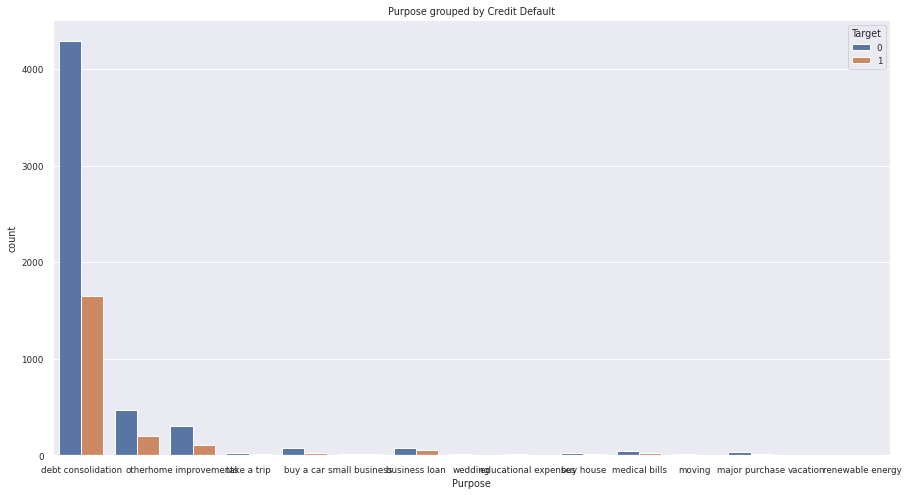

In [45]:
show_countplot('Purpose', 'Credit Default', prep, title='Target', figsize=(15, 8))

In [46]:
prep.groupby(['Purpose', 'Credit Default'])['Credit Default'].count()

Purpose               Credit Default
business loan         0                   74
                      1                   55
buy a car             0                   72
                      1                   24
buy house             0                   25
                      1                    9
debt consolidation    0                 4290
                      1                 1654
educational expenses  0                    9
                      1                    1
home improvements     0                  304
                      1                  108
major purchase        0                   31
                      1                    9
medical bills         0                   49
                      1                   22
moving                0                    9
                      1                    2
other                 0                  468
                      1                  197
renewable energy      1                    2
small business    

–°–∞–º–∞—è –±–æ–ª—å—à–∞—è –¥–æ–ª—è –Ω–µ–≤–æ–∑–≤—Ä–∞—Ç–æ–≤ –ø–æ –±–∏–∑–Ω–µ—Å –∫—Ä–µ–¥–∏—Ç–∞–º. –û–±—ä–µ–¥–∏–Ω–∏–º –∫–∞—Ç–µ–≥–æ—Ä–∏—é 'renewable energy' —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–µ–π 'business loan'.

In [47]:
prep.loc[prep['Purpose'] == 'renewable energy', 'Purpose'] = 'business loan'

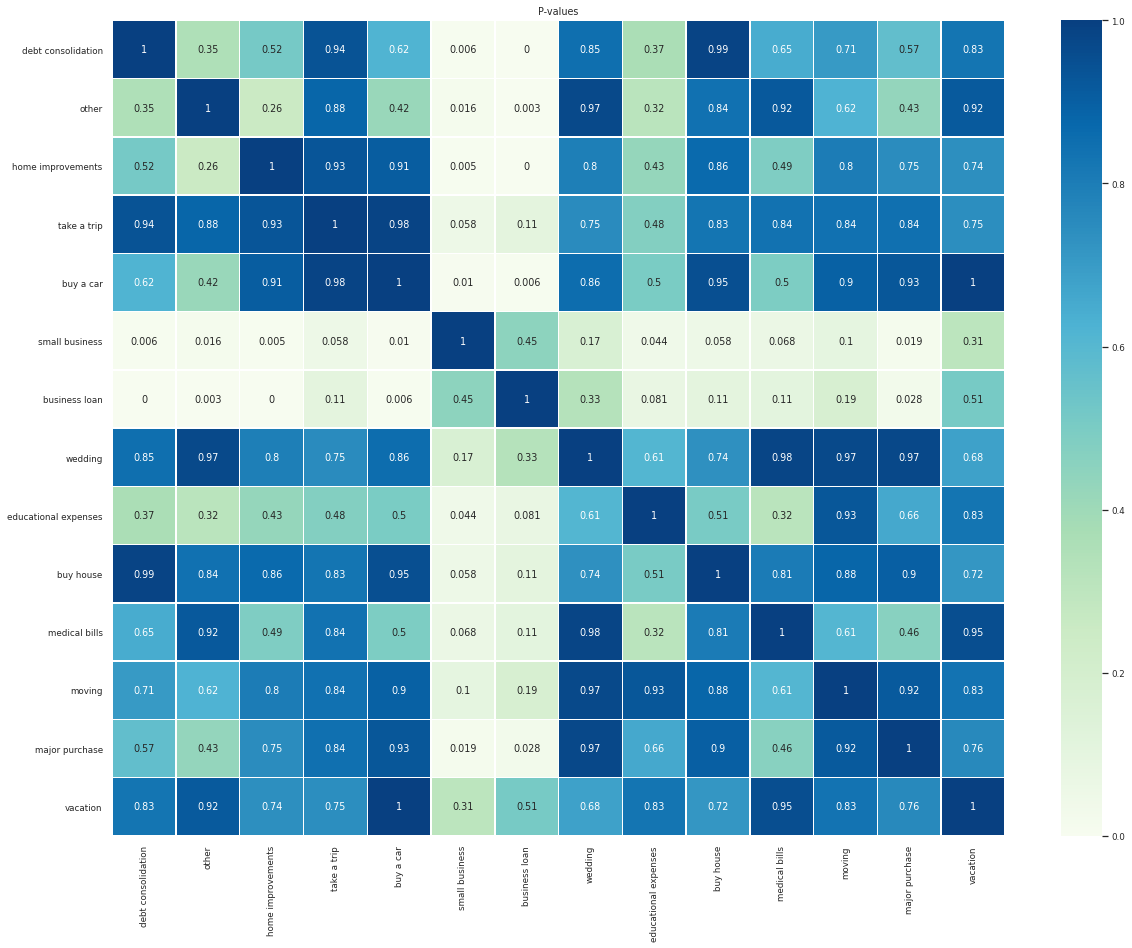

In [48]:
p_values = p_values_matrix(prep, 'Purpose', 'Credit Default')

show_heatmap(p_values.round(3), title='P-values')

–ö–∞—Ç–µ–≥–æ—Ä–∏–∏ 'small business' –∏ 'business loan' –º–æ–∂–Ω–æ –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –≤ –æ–¥–Ω—É.

In [49]:
prep.loc[prep['Purpose'] == 'small business', 'Purpose'] = 'business loan'

–û–±—ä–µ–¥–∏–Ω–∏–º –ø–æ—Ö–æ–∂–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏.

In [51]:
prep.loc[prep['Purpose'] == 'buy a car', 'Purpose'] = 'major purchase'
prep.loc[prep['Purpose'] == 'buy house', 'Purpose'] = 'major purchase'
prep.loc[prep['Purpose'] == 'moving', 'Purpose'] = 'major purchase'
prep.loc[prep['Purpose'] == 'wedding', 'Purpose'] = 'major purchase'
prep.loc[prep['Purpose'] == 'take a trip', 'Purpose'] = 'major purchase'
prep.loc[prep['Purpose'] == 'home improvements', 'Purpose'] = 'major purchase'
prep.loc[prep['Purpose'] == 'educational expenses', 'Purpose'] = 'major purchase'

prep.loc[prep['Purpose'] == 'vacation', 'Purpose'] = 'other'
prep.loc[prep['Purpose'] == 'medical bills', 'Purpose'] = 'other'

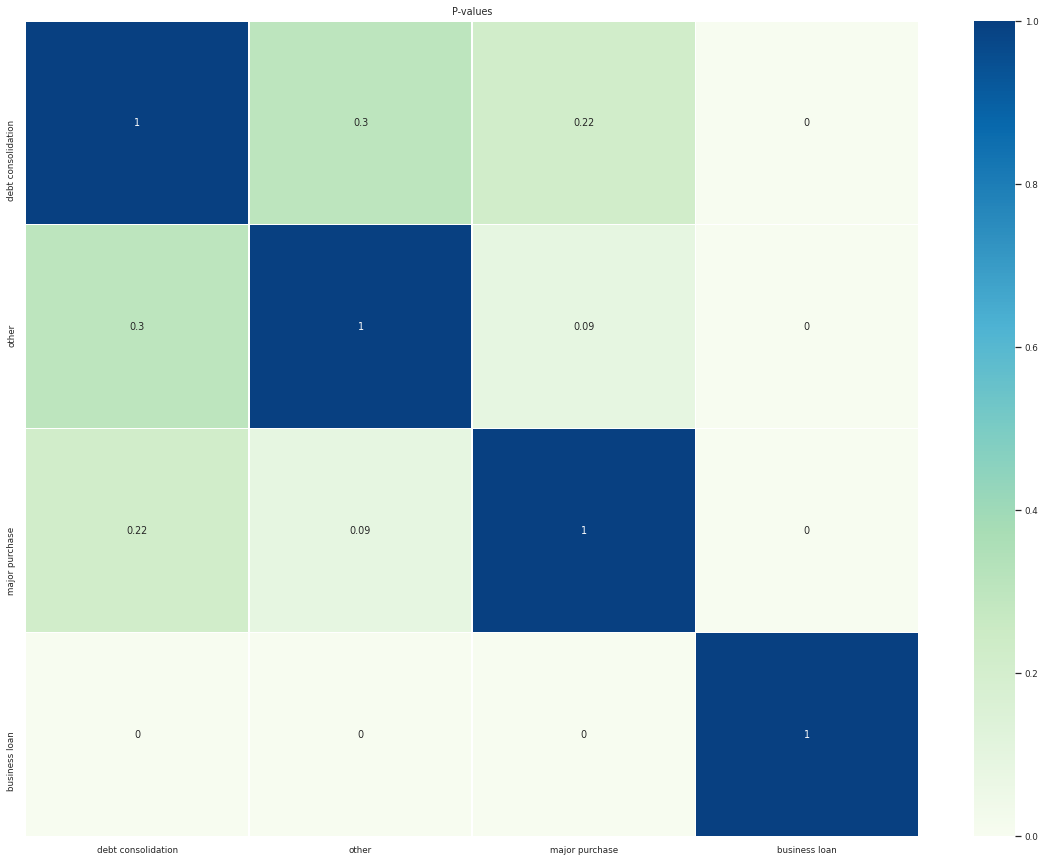

In [52]:
p_values = p_values_matrix(prep, 'Purpose', 'Credit Default')

show_heatmap(p_values.round(3), title='P-values')

–ü–æ–ª—É—á–∏–ª–∏—Å—å —Ä–∞–∑–ª–∏—á–∏–º—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É 'Purpose'.

### 3.6 Term

In [53]:
prep['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

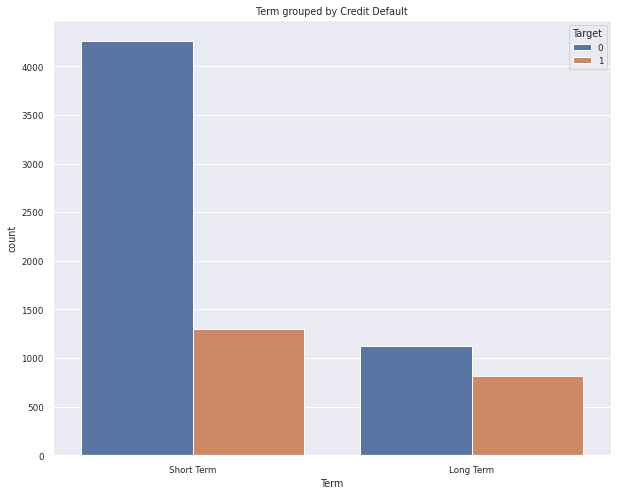

In [54]:
show_countplot('Term', 'Credit Default', prep, title='Target')

–ü–æ –≥—Ä–∞—Ñ–∏–∫—É –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Ä–∞–∑–ª–∏—á–∏–µ –¥–æ–ª–µ–π –≤ —Ä–∞–∑—Ä–µ–∑–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–π –ø—Ä–∏–∑–Ω–∞–∫–∞. 

–ü–æ—Ö–æ–∂–µ, —á—Ç–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –Ω–µ–≤—ã–ø–ª–∞—Ç—ã –∫—Ä–µ–¥–∏—Ç–∞ —Å–≤—è–∑–∞–Ω–∞ —Å –µ–≥–æ —Å—Ä–æ–∫–æ–º. –ë–æ–ª—å—à–∏–π —Å—Ä–æ–∫ - –±–æ–ª—å—à–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –Ω–µ–≤—ã–ø–ª–∞—Ç—ã. –ü—Ä–∏–≤–µ–¥–µ–º –ø—Ä–∏–∑–Ω–∞–∫ –∫ –±–∏–Ω–∞—Ä–Ω–æ–º—É –≤–∏–¥—É, –≥–¥–µ 0 - –∫—Ä–∞—Ç–∫–æ—Å—Ä–æ—á–Ω—ã–π –∫—Ä–µ–¥–∏—Ç, 1 - –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω—ã–π.

In [55]:
prep.rename(columns={'Term': 'is_long_term'}, inplace=True)
prep['is_long_term'] = (prep['is_long_term'] == 'Long Term').astype('uint8')

In [56]:
prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             7500 non-null   object 
 1   Annual Income              7500 non-null   float64
 2   is_unemployed              7500 non-null   uint8  
 3   Tax Liens                  7500 non-null   float64
 4   Number of Open Accounts    7500 non-null   float64
 5   Years of Credit History    7500 non-null   float64
 6   Maximum Open Credit        7500 non-null   float64
 7   Number of Credit Problems  7500 non-null   float64
 8   Bankruptcies               7500 non-null   float64
 9   Purpose                    7500 non-null   object 
 10  is_long_term               7500 non-null   uint8  
 11  Current Loan Amount        7500 non-null   float64
 12  Current Credit Balance     7500 non-null   float64
 13  Monthly Debt               7500 non-null   float

### 3.7 Credit Score

–ü–æ –ø—Ä–∏–∑–Ω–∞–∫—É Credit Score –º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π. –ü—Ä–æ–≤–µ—Ä–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –¥—Ä—É–≥–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –¥–∞–Ω–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º.

In [57]:
def show_barplot(data, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    sns.barplot(x=data.values, y=data.index)
    
    if data.name is not None:
        plt.title(f'Correlation with {data.name}')
    plt.show()

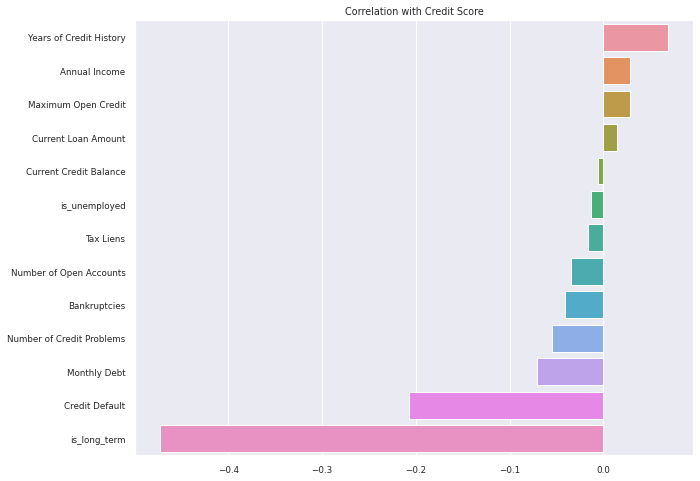

In [58]:
corr_with_score = prep.corr()['Credit Score'].sort_values(ascending=False)[1:]

show_barplot(corr_with_score)

–ü–æ –≥—Ä–∞—Ñ–∏–∫—É –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –≤—ã—Å–æ–∫–∞—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞ 'is_long_term' —Å –ø—Ä–∏–∑–Ω–∞–∫–æ–º 'Credit Score'.

–í–µ—Ä–æ—è—Ç–Ω–æ –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏–µ 'Credit Score' –¥–ª—è –Ω–∞–±–ª—é–¥–µ–Ω–∏–π —Å –∫–æ—Ä–æ—Ç–∫–∏–º —Å—Ä–æ–∫–æ–º –∫—Ä–µ–¥–∏—Ç–∞ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏—è 'Credit Score' –¥–ª—è –Ω–∞–±–ª—é–¥–µ–Ω–∏–π —Å –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω—ã–º —Å—Ä–æ–∫–æ–º –∫—Ä–µ–¥–∏—Ç–∞. –°—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º –≥–∏–ø–æ—Ç–µ–∑—É.

**–ì–∏–ø–æ—Ç–µ–∑–∞**

* –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –æ–∂–∏–¥–∞–Ω–∏—è –≤ –¥–≤—É—Ö –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö —Ä–∞–≤–Ω—ã
* –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –æ–∂–∏–¥–∞–Ω–∏—è –≤ –¥–≤—É—Ö –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è
* –ö—Ä–∏—Ç–µ—Ä–∏–π: –∫—Ä–∏—Ç–µ—Ä–∏–π –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏
* –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ ùõº: 0.05
* –ö—Ä–∏—Ç–∏—á–µ—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å: –¥–≤—É—Ö—Å—Ç–æ—Ä–æ–Ω–Ω—è—è

In [59]:
credit_score_short_term = prep[prep['is_long_term'] == 0]['Credit Score']
credit_score_long_term = prep[prep['is_long_term'] == 1]['Credit Score']

mannwhitneyu(credit_score_short_term, credit_score_long_term)

MannwhitneyuResult(statistic=3236275.5, pvalue=3.287351490059609e-153)

–ó–Ω–∞—á–µ–Ω–∏–µ p-value –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –Ω–∏–∂–µ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–≥–æ. –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ –Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –æ —Ä–∞–≤–Ω–æ—Å—Ç–∏ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –æ–∂–∏–¥–∞–Ω–∏–π –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è. –ü–æ—Å—Ç—Ä–æ–∏–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –¥–ª—è –¥–∞–Ω–Ω—ã—Ö –≤—ã–±–æ—Ä–æ–∫.

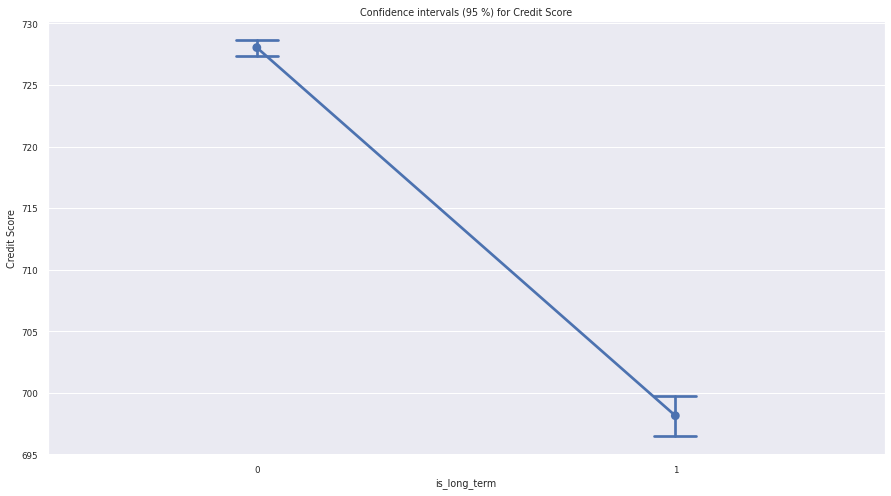

In [60]:
show_pointplot('is_long_term', 'Credit Score', prep)

–ó–∞–ø–æ–ª–Ω–∏–º –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è Credit Score —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º–∏ –º–µ–¥–∏–∞–Ω–∞–º–∏.

In [61]:
terms = prep['is_long_term'].unique()

for term in terms:
    prep.loc[(prep['Credit Score'].isnull()) & 
             (prep['is_long_term'] == term), 
             'Credit Score'] = \
    prep[prep['is_long_term'] == term]['Credit Score'].median()

In [62]:
prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             7500 non-null   object 
 1   Annual Income              7500 non-null   float64
 2   is_unemployed              7500 non-null   uint8  
 3   Tax Liens                  7500 non-null   float64
 4   Number of Open Accounts    7500 non-null   float64
 5   Years of Credit History    7500 non-null   float64
 6   Maximum Open Credit        7500 non-null   float64
 7   Number of Credit Problems  7500 non-null   float64
 8   Bankruptcies               7500 non-null   float64
 9   Purpose                    7500 non-null   object 
 10  is_long_term               7500 non-null   uint8  
 11  Current Loan Amount        7500 non-null   float64
 12  Current Credit Balance     7500 non-null   float64
 13  Monthly Debt               7500 non-null   float

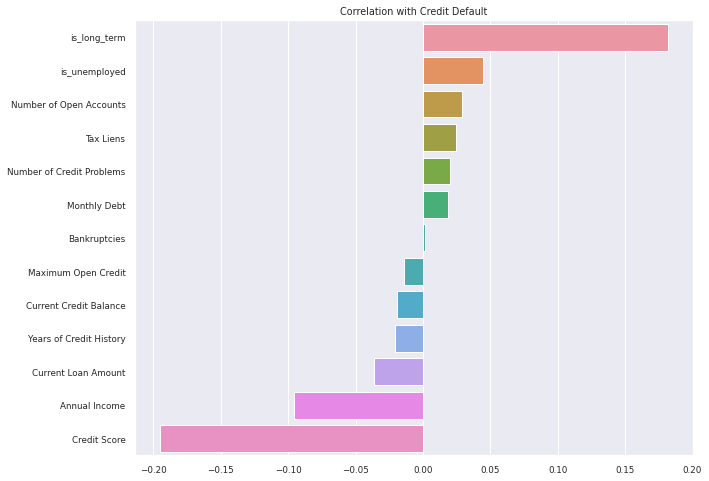

In [63]:
corr_with_target = prep.corr()['Credit Default'].sort_values(ascending=False)[1:]

show_barplot(corr_with_target)

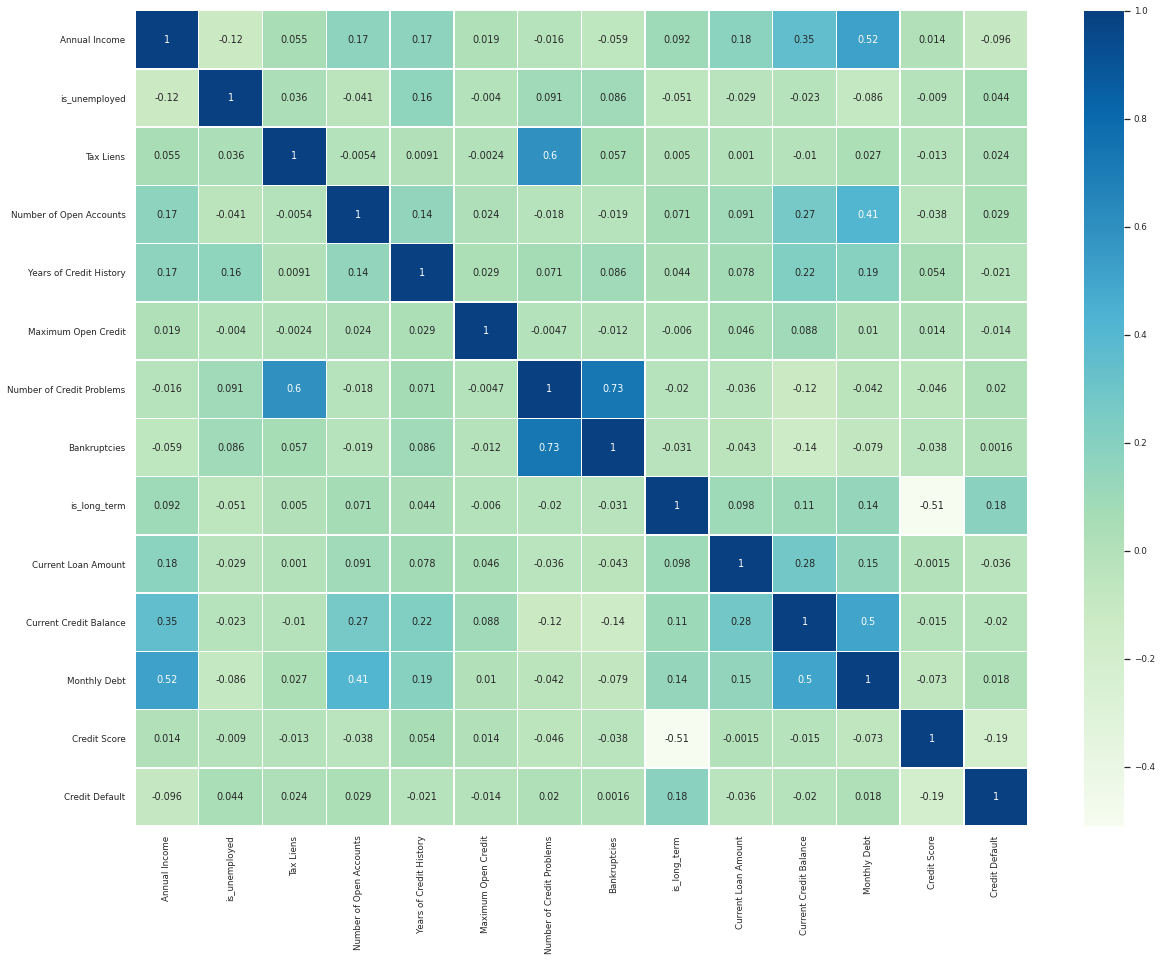

In [64]:
show_heatmap(prep.corr().round(5))

## 4. –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏.

–î–ª—è –Ω–∞—á–∞–ª–∞ —Ä–µ–∞–ª–∏–∑—É–µ–º –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –¥–∞–Ω–Ω—ã—Ö –∫–∞–∫ –∫–ª–∞—Å—Å - –¥–ª—è –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –≤ –ø–∞–π–ø–ª–∞–π–Ω–∞—Ö.

In [65]:
class DataPreprocessing:
    
    def __init__(self, purpose, home_ownership, features=None):        
        self.purpose = purpose
        self.home_ownership = home_ownership
        self.features = features
    
    def fit(self, X, *_):
        prep_df = X.copy()
        
        prep_df['Years in current job'].fillna('N/A', inplace=True)
        
        # –º–µ–¥–∏–∞–Ω—ã –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–π
        self.income_medians = {}
        for years in prep_df['Years in current job'].unique():
            self.income_medians[years] = prep_df[prep_df['Years in current job'] == years]['Annual Income'].median()
        
        prep_df.loc[prep_df['Credit Score'] > 1e3, 'Credit Score'] //= 10
        # –º–µ–¥–∏–∞–Ω—ã –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–π
        self.score_medians = {}
        for term in prep_df['Term'].unique():
            self.score_medians[term] = prep_df[prep_df['Term'] == term]['Credit Score'].median()
        
        self.bankruptcies_mode = prep_df['Bankruptcies'].mode().values[0]
        
        return self
        
    def transform(self, X, **_):
        prep_df = X.copy()
        
        prep_df['Years in current job'].fillna('N/A', inplace=True)
        
        # –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –º–µ–¥–∏–∞–Ω–∞–º–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
        for key in self.income_medians:
            prep_df.loc[
                (prep_df['Annual Income'].isnull()) & 
                (prep_df['Years in current job'] == key), 
                'Annual Income'] = \
            self.income_medians[key]
        
        # –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –±–∏–Ω–∞—Ä–Ω–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É
        prep_df.rename(columns={'Years in current job': 'is_unemployed'}, inplace=True)
        prep_df['is_unemployed'] = (prep_df['is_unemployed'] == 'N/A').astype('uint8')
        
        prep_df.loc[prep_df['Credit Score'] > 1e3, 'Credit Score'] //= 10
        
        # –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –º–µ–¥–∏–∞–Ω–∞–º–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
        for key in self.score_medians:
            prep_df.loc[
                (prep_df['Credit Score'].isnull()) & 
                (prep_df['Term'] == key), 
                'Credit Score'] = \
            self.score_medians[key]
        
        # –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –±–∏–Ω–∞—Ä–Ω–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É
        prep_df.rename(columns={'Term': 'is_long_term'}, inplace=True)
        prep_df['is_long_term'] = (prep_df['is_long_term'] == 'Long Term').astype('uint8')
               
        # –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –º–æ–¥–æ–π
        prep_df['Bankruptcies'].fillna(self.bankruptcies_mode, inplace=True)
        
        # —É–¥–∞–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞
        prep_df.drop('Months since last delinquent', axis=1, inplace=True)
        
        # –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
        for key in self.purpose:
            prep_df.loc[prep_df['Purpose'].isin(self.purpose[key]), 'Purpose'] = key
            
        for key in self.home_ownership:
            prep_df.loc[prep_df['Home Ownership'].isin(self.home_ownership[key]), 'Home Ownership'] = key
        
        prep_df = pd.get_dummies(prep_df)
        
        if self.features is not None:
            prep_df = prep_df[self.features]
        
        return prep_df
    
    def fit_transform(self, X, y=None, **_):
        return self.fit(X).transform(X)

In [66]:
# –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π.
# –∫–ª—é—á —Å–ª–æ–≤–∞—Ä—è - –∫–∞—Ç–µ–≥–æ—Ä–∏—è –≤ –∫–æ—Ç–æ—Ä—É—é –æ–±—ä–µ–¥–∏–Ω—è—é—Ç—Å—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –∏–∑ –∫–æ—Ä—Ç–µ–∂–∞ (–∑–Ω–∞—á–µ–Ω–∏–µ —Å–ª–æ–≤–∞—Ä—è)
purpose = {
    'major purchase': ('buy a car', 
                       'buy house', 
                       'moving', 
                       'wedding', 
                       'take a trip', 
                       'home improvements', 
                       'educational expenses',), 
    'business loan': ('small business', 
                      'renewable energy',), 
    'other': ('vacation', 
              'medical bills',)
}

home_ownership = {'Home Mortgage': ('Have Mortgage',)}

–î–ª—è –ª—É—á—à–µ–≥–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ - –±—É–¥–µ–º –æ—Å—É—â–µ—Å—Ç–≤–ª—è—Ç—å –ø–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø–æ —Å–µ—Ç–∫–µ.

–í –∫–∞—á–µ—Å—Ç–≤–µ –º–æ–¥–µ–ª–∏ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å LightGBM - –º–æ–¥–µ–ª—å –±–æ–ª–µ–µ –±—ã—Å—Ç—Ä—É—é, –≤ —Å—Ä–∞–≤–Ω–µ–Ω–∏–∏ —Å –¥—Ä—É–≥–∏–º–∏ –±—É—Å—Ç–∏–Ω–≥–æ–≤—ã–º–∏ –∞–ª–≥–æ—Ä–∏—Ç–º–∞–º–∏. –°–∫–æ—Ä–æ—Å—Ç—å –≤–∞–∂–Ω–∞ –ø—Ä–∏ –ø–æ–¥–±–æ—Ä–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø–æ —Å–µ—Ç–∫–µ.

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline


def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [67]:
X = train.drop(TARGET, axis=1)
y = train[TARGET]

In [68]:
# –∑–∞–¥–∞–¥–∏–º –≤–µ—Å–∞ –¥–ª—è –∫–ª–∞—Å—Å–æ–≤
labels, counts = np.unique(y.values, return_counts=True)

weights = (counts/sum(counts))[::-1]
lgbm_weight = dict(zip(labels, weights))

In [70]:
preprocessing = DataPreprocessing(purpose, home_ownership)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
%%time
param_grid = {
    'estimator__max_depth': range(1, 10), 
    'estimator__n_estimators': range(100, 1001, 100), 
    'estimator__num_leaves': range(10, 100, 10), 
    'estimator__min_data_in_leaf': range(50, 150, 10)
}


pipe = Pipeline([('preprocessing', DataPreprocessing(purpose, home_ownership)), 
                 ('estimator', LGBMClassifier(class_weight=lgbm_weight))])


gs = GridSearchCV(pipe, param_grid, scoring='f1', cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

y_train_pred = gs.predict(X_train)
y_test_pred = gs.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
TRAIN

              precision    recall  f1-score   support

           0       0.87      0.63      0.73      4328
           1       0.44      0.76      0.56      1672

    accuracy                           0.67      6000
   macro avg       0.66      0.70      0.65      6000
weighted avg       0.75      0.67      0.68      6000

TEST

              precision    recall  f1-score   support

           0       0.84      0.61      0.71      1059
           1       0.43      0.72      0.54       441

    accuracy                           0.64      1500
   macro avg       0.64      0.67      0.62      1500
weighted avg       0.72      0.64      0.66      1500

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               645  414
1               123  318
CPU times: user 6min 33s, sys: 26.9 s, total: 7min
Wall time: 2h 9min 17s


In [118]:
params = gs.best_params_.copy()

keys = list(params.keys())

for key in keys:
    new_key = key.replace('estimator__', '')
    params[new_key] = params.pop(key)
    
params

{'max_depth': 2, 'min_data_in_leaf': 60, 'n_estimators': 200, 'num_leaves': 10}

In [119]:
pipe = Pipeline([('preprocessing', DataPreprocessing(purpose, home_ownership)), 
                 ('estimator', LGBMClassifier(class_weight=lgbm_weight, **params))])

In [120]:
pipe.fit(X_train, y_train)

preds = pipe.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


In [123]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.61      0.71      1059
           1       0.43      0.72      0.54       441

    accuracy                           0.64      1500
   macro avg       0.64      0.67      0.62      1500
weighted avg       0.72      0.64      0.66      1500



## 5. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ. –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ.

In [129]:
pipe.fit(X, y)

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


Pipeline(steps=[('preprocessing',
                 <__main__.DataPreprocessing object at 0x7f81d79e6880>),
                ('estimator',
                 LGBMClassifier(class_weight={0: 0.28173333333333334,
                                              1: 0.7182666666666667},
                                max_depth=2, min_data_in_leaf=60,
                                n_estimators=200, num_leaves=10))])

In [134]:
pred = pd.DataFrame()
pred['Id'] = test.index
pred[TARGET] = pipe.predict(test)
pred.to_csv('final_predict.csv', index=False)

–°—Å—ã–ª–∫–∞ –Ω–∞ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏–µ:

https://www.kaggle.com/c/gb-credit-default/leaderboard

15-–µ –º–µ—Å—Ç–æ –Ω–∞ Public Leaderboard –Ω–∞ –º–æ–º–µ–Ω—Ç –∑–∞–≥—Ä—É–∑–∫–∏. –ü—Ä–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–º —Å–æ–∫—Ä–∞—â–µ–Ω–∏–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ - –Ω–µ–ø–ª–æ—Ö–æ–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç.